In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr
from matplotlib.pyplot import rc_context
from sklearn import metrics

import seaborn as sns
import sys
import os

sys.path.append('../../../Code/')
from utils import read_dataset_log

sys.path.append('../../../Code/starCAT')
from starcat import starCAT

In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
label_fontsize = 10
tick_fontsize = 8

In [3]:
figdir = '../../../Figures/Components'

In [4]:
from matplotlib import colors

In [5]:
! pwd

/data/srlab1/TCAT/Analysis/PerDataset/Sparks


In [9]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label,tcat_fn_old
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCA

In [10]:
gep_info = read_dataset_log('cGEP_Name')
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))


# Run TCAT

In [13]:
dataset = 'Sparks'
toadd = '.20231016.FiltSingletons'

In [9]:
adata = sc.read(params.loc[dataset, 'raw_counts_fn'])

In [14]:
metagep_params = read_dataset_log('cGEP Paths').iloc[0,:]
metagep_params

clustering_fn                                /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
clustering_with_singletons_fn                /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
merged_hvgs                                  /data/srlab1/TCAT/Data/TCAT/MergedHVG_UnionAll...
reference_fn                                 /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
renamed_ref_fn                               /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra                          /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra_withsingletons           /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra                   /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra_withsingletons    /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra                               /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra_withsingletons                /data

In [11]:
ref_fn = metagep_params['reference_fn']
print(ref_fn)

/data/srlab1/TCAT/Data/TCAT/merged_spectra.Gene_TPM_Renorm_VarNorm.Gene_Intersection.TPMrenorm.VarNorm.HVGunion.FiltSingletons.Mean.20231016.filteredHVG.tsv


In [154]:
pd.read_csv(ref_fn, sep='\t', index_col=0).shape

(52, 3412)

In [12]:
tmod = starCAT(reference=ref_fn)
usage_sparks, _ = tmod.fit_transform(adata, return_unnormalized=True)

Using user specified reference spectra file /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gene_TPM_Renorm_VarNorm.Gene_Intersection.TPMrenorm.VarNorm.HVGunion.FiltSingletons.Mean.20231016.filteredHVG.tsv
No scores provided
3412 out of 3412 genes in the reference overlap with the query


/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [13]:
outfn = '../../../Data/TCAT/TCAT_Usage%s.%s.tsv' % (toadd, dataset)
print(outfn)
usage_sparks.to_csv(outfn, sep='\t')

../../../Data/TCAT/TCAT_Usage.20231016.FiltSingletons.Sparks.tsv


In [14]:
usage_norm = usage_sparks.div(usage_sparks.sum(axis=1), axis=0)

In [15]:
del(adata)

# Prepare file paths and load data

In [29]:
gating = pd.read_csv(params.loc[dataset, 'manual_gating_fn'], index_col = 0, sep = '\t',
                     header=0, names = ['cell_gating'])

meta = pd.read_csv(params.loc[dataset, 'metadata_fn'], index_col = 0, sep = '\t')
meta['cell_gating'] = gating.loc[meta.index, 'cell_gating']
meta = meta.loc[usage_norm.index, ]

cluster_col = params.loc[dataset, 'cluster_col']

/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NameError: name 'usage_norm' is not defined

In [17]:
params.loc[dataset, 'metadata_fn']

'/data/srlab1/TCAT/Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering_withSampID.tsv'

In [18]:
meta.head(3)

,alt.subject.id,visit,covid.diagnosis.start.date.to.sample.drawn,group,sex,age,race,ethnicity,flu.vax.count.10yr,vaccine,...,leiden_res2_25,leiden_res2,leiden_res1_75,leiden_res1_5,leiden_res1_25,leiden_res0_75,leiden_res0_5,leiden_res0_25,alt.sample.id,cell_gating
Batch1_COVFLU_CITE_multi5P09_GCATGCGCAGCCTATA-1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,5,4,0,0,0,0,Control,CD4_Naive
Batch1_COVFLU_CITE_multi5P02_TTGTAGGCAGTATCTG-1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,2,4,1,1,Control,CD4_CM
Batch1_COVFLU_CITE_multi5P02_GATGCTACAGCTTAAC-1,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,1,2,0,0,Control,CD4_Naive


In [15]:
train_dir = '/data/srlab1/TCAT/Data/PerDataset/COMBAT'
test_dir =  '/data/srlab1/TCAT/Data/PerDataset/Sparks2023'

original =  '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad'
toadd = ''
paths = {
        'Original' : original, # AnnData containing RNA +/- ADT,
        'RNA_LogTP10K_Varnorm_Harmony':original.replace('.h5ad', toadd + 'RNA.LogTP10K.Varnorm.Harmony.h5ad'),
        'Metadata_RNAClustering' : original.replace('.h5ad', toadd + 'metadata_RNAClustering.tsv')
        }
paths

{'Original': '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad',
 'RNA_LogTP10K_Varnorm_Harmony': '../../../Data/PerDataset/Sparks2023/T_fromSeuratRNA.LogTP10K.Varnorm.Harmony.h5ad',
 'Metadata_RNAClustering': '../../../Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering.tsv'}

In [16]:
paths.update({
        'clus_roc':original.replace('T_fromSeurat.h5ad', toadd + 'ROC_PublishedClustering.tsv'),
        'max_identity_roc' : original.replace('T_fromSeurat.h5ad', toadd + 'ROC_MaxIdentityGEP.tsv'),
        'roc' : original.replace('T_fromSeurat.h5ad', toadd + 'ROC_GEPs.tsv'),
        'auc':original.replace('T_fromSeurat.h5ad', toadd + 'AUC_GEPs.tsv'),
        'rna_clus_accuracy_no_overlap':original.replace('T_fromSeurat.h5ad', toadd + 'ROC_RNAClustering_MaxAccuracy_NoOverlap.tsv'),
        'accuracy': original.replace('T_fromSeurat.h5ad', toadd + 'GatePred_Accuracy_AllClusters.tsv'),
        'yasumizu_roc': original.replace('T_fromSeurat.h5ad', toadd + 'Yasumizu_ROC_GEPs.tsv'),
        'yasumizu_auc':original.replace('T_fromSeurat.h5ad', toadd + 'Yasumizu_AUC_GEPs.tsv'),
        'gavish_roc': original.replace('T_fromSeurat.h5ad', toadd + 'Gavish_ROC_GEP_GeneScores.tsv'),
        'gavish_auc':original.replace('T_fromSeurat.h5ad', toadd + 'Gavish_AUC_GEP_GeneScores.tsv'),
    
        'roc_TCAT_MultinomialLogisticRegression' : os.path.join(test_dir, 'ROC_TCAT_MultinomialLogisticRegression.tsv'),
        'auc_TCAT_MultinomialLogisticRegression': os.path.join(test_dir, 'AUC_TCAT_MultinomialLogisticRegression.tsv'),
        'pred_TCAT_MultinomialLogisticRegression': os.path.join(test_dir, 'Predictions_TCAT_MultinomialLogisticRegression.tsv'),
        'predroc_TCAT_MultinomialLogisticRegression': os.path.join(test_dir, 'ROCPredictions_TCAT_MultinomialLogisticRegression.tsv'),
        'model_TCAT_MultinomialLogisticRegression': os.path.join(test_dir, 'model_TCAT_MultinomialLogisticRegression.pkl'),
    
        'roc_Yasu_MultinomialLogisticRegression' : os.path.join(test_dir, 'ROC_Yasu_MultinomialLogisticRegression.tsv'),
        'auc_Yasu_MultinomialLogisticRegression': os.path.join(test_dir, 'AUC_Yasu_MultinomialLogisticRegression.tsv'),
        'pred_Yasu_MultinomialLogisticRegression': os.path.join(test_dir, 'Predictions_Yasu_MultinomialLogisticRegression.tsv'),
        'predroc_Yasu_MultinomialLogisticRegression': os.path.join(test_dir, 'ROCPredictions_Yasu_MultinomialLogisticRegression.tsv'),    
        'model_Yasu_MultinomialLogisticRegression': os.path.join(test_dir, 'model_Yasu_MultinomialLogisticRegression.pkl'),    
    

})
paths

{'Original': '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad',
 'RNA_LogTP10K_Varnorm_Harmony': '../../../Data/PerDataset/Sparks2023/T_fromSeuratRNA.LogTP10K.Varnorm.Harmony.h5ad',
 'Metadata_RNAClustering': '../../../Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering.tsv',
 'clus_roc': '../../../Data/PerDataset/Sparks2023/ROC_PublishedClustering.tsv',
 'max_identity_roc': '../../../Data/PerDataset/Sparks2023/ROC_MaxIdentityGEP.tsv',
 'roc': '../../../Data/PerDataset/Sparks2023/ROC_GEPs.tsv',
 'auc': '../../../Data/PerDataset/Sparks2023/AUC_GEPs.tsv',
 'rna_clus_accuracy_no_overlap': '../../../Data/PerDataset/Sparks2023/ROC_RNAClustering_MaxAccuracy_NoOverlap.tsv',
 'accuracy': '../../../Data/PerDataset/Sparks2023/GatePred_Accuracy_AllClusters.tsv',
 'yasumizu_roc': '../../../Data/PerDataset/Sparks2023/Yasumizu_ROC_GEPs.tsv',
 'yasumizu_auc': '../../../Data/PerDataset/Sparks2023/Yasumizu_AUC_GEPs.tsv',
 'gavish_roc': '../../../Data/PerDataset/Sparks2023/Gavish_ROC_GEP

In [21]:
adata_RNA = sc.read(paths['RNA_LogTP10K_Varnorm_Harmony'])

Only considering the two last: ['.Harmony', '.h5ad'].
Only considering the two last: ['.Harmony', '.h5ad'].


In [22]:
adata_RNA

AnnData object with n_obs × n_vars = 336739 × 28402
    obs: 'alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn', 'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr', 'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch', 'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene', 'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE', 'nFeature_SCT', 'percent.mt', 'percent.largest.gene', 'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3', 'n_counts', 'leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25', 'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25', 'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony_RNA_UMAP', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'd

In [23]:
individual_col = params.loc[dataset, 'individual_col']
sample_col = params.loc[dataset, 'sample_col']

In [24]:
adata_RNA.obs[individual_col].unique()

['Control', 'COVR-23', 'HC-12', 'COVR-10', 'COVR-6', ..., 'COVR-14', 'HC-20', 'COVR-2', 'HC-40', 'COVR-26']
Length: 41
Categories (41, object): ['COVR-2', 'COVR-4', 'COVR-6', 'COVR-8', ..., 'HC-35', 'HC-37', 'HC-38', 'HC-40']

In [25]:
adata_RNA

AnnData object with n_obs × n_vars = 336739 × 28402
    obs: 'alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn', 'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr', 'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch', 'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene', 'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE', 'nFeature_SCT', 'percent.mt', 'percent.largest.gene', 'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3', 'n_counts', 'leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25', 'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25', 'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony_RNA_UMAP', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'd

In [26]:
adata_RNA.shape, meta.shape

((336739, 28402), (336739, 43))

In [27]:
meta.columns[meta.columns.str.startswith('leiden_res')]

Index(['leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25',
       'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25',
       'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25'],
      dtype='object')

# Calculate statistics

Compare various usage thresholds' ability to predict cell type as defined by cell gatingrna_cluster_col

In [28]:
cluster_col

'cell.type'

In [29]:
meta[cluster_col].value_counts()

CD4_Naive            110879
CD4_CM                57898
CD8_EM                33099
CD8_Naive             31710
CD4_EM                23936
MAIT                  18509
CD8_TEMRA             16101
gdT-Vd2               14904
CD8_CM                10732
CD4_Treg               8162
CD4_platelet_bind      5952
CD8_TRM                2743
CD4_Tfh                1302
CD8_proliferating       812
Name: cell.type, dtype: int64

In [30]:
gating.value_counts()

cell_gating
CD4_Naive      96784
CD4_CM         56439
CD4_EM         40883
CD8_EM         39647
CD8_Naive      29266
MAIT           18065
CD8_TEMRA      16914
gdT            14822
Treg            8146
CD8_CM          5187
CD4_TEMRA       4735
DP              4408
DN              1443
dtype: int64

In [30]:
gates_to_exclude = ['CD4_TEMRA', 'DN', 'DP']
gate_list = list(set(gating['cell_gating'].unique()).difference(gates_to_exclude))

gate_list

['CD8_Naive',
 'CD8_CM',
 'CD4_Naive',
 'MAIT',
 'CD4_EM',
 'gdT',
 'CD8_EM',
 'CD4_CM',
 'CD8_TEMRA',
 'Treg']

In [32]:
len(usage_norm.columns)

52

In [33]:
usage_norm.columns

Index(['CellCycle-G2M', 'CD4-Naive_Translation', 'HLA', 'ISG', 'MALAT1_Mito',
       'Doublet-RBC', 'gdT-Blood', 'CellCycle-S', 'Cytotoxic',
       'Doublet-Platelet', 'HeatShock2', 'S100A10/LMNA', 'MAIT',
       'CellCycle-Histone', 'COMBAT_Cytoskeleton', 'HeatShock1',
       'High-Cytokine', 'KLRC2/GNLY_gdT', 'Doublet-Myeloid', 'Metallothionein',
       'CD4 TCM_Tfh', 'IEG_IEG-Blood_IEG-Tissue', 'CD8_EM', 'IEG_YPEL5/CREM_1',
       'CD4-Naive_TBRU', 'Treg', 'Th17', 'MALAT1_TBRU', 'CD8-Naive',
       'RGCC/MYADM_S100A10/LMNA', 'TIMD4/CD38', 'AMP-RA_Doublet-Plasma',
       'BCL2/CDK6', 'IL10/CD38', 'CCR3+-Th2', 'Th2', 'ICOS/ACTG1',
       'Doublet-Bcell', 'CD4 TEM', 'CTLA4+CD38+_IL26/CTSH', 'CD8/KLRC2',
       'IL26/CTSH', 'AMP-RA_Tfh', 'EBI3-Activation', 'HIV-Vaccine',
       'IEG_YPEL5/CREM_2', 'AMP-RA_Pan-Cancer', 'SOX4/MME',
       'CH25H/DDIT4_Pan-Cancer', 'AMP-RA:Tph_Single', 'Pan-Cancer:Tph_Single',
       'Pan-Cancer:Tfh_Single'],
      dtype='object')

In [34]:
meta[cluster_col].value_counts()

CD4_Naive            110879
CD4_CM                57898
CD8_EM                33099
CD8_Naive             31710
CD4_EM                23936
MAIT                  18509
CD8_TEMRA             16101
gdT-Vd2               14904
CD8_CM                10732
CD4_Treg               8162
CD4_platelet_bind      5952
CD8_TRM                2743
CD4_Tfh                1302
CD8_proliferating       812
Name: cell.type, dtype: int64

In [35]:
gate_list

['CD8_TEMRA',
 'gdT',
 'CD8_Naive',
 'Treg',
 'CD8_EM',
 'CD4_EM',
 'CD4_Naive',
 'CD4_CM',
 'MAIT',
 'CD8_CM']

In [36]:
gate_clusters = [['CD8_CM'], ['CD4_EM'], ['CD4_CM'], ['CD8_EM'],  ['CD8_TEMRA'], ['CD8_Naive'],
                 ['gdT-Vd2'], ['CD4_Treg'], ['MAIT'], ['CD4_Naive'],
                ]

In [37]:
gate_dict = {'CD8_TEMRA': ['CD8_TEMRA'],
 'Treg': ['CD4_Treg'],
 'CD4_EM': ['CD4_EM'],
 'CD4_CM': ['CD4_CM'],
 'CD8_CM': ['CD8_CM'],
 'CD8_EM': ['CD8_EM'],
 'CD8_Naive': ['CD8_Naive'],
 'MAIT': ['MAIT'],
 'CD4_Naive': ['CD4_Naive'],
 'gdT': ['gdT-Vd2']}

gate_dict

{'CD8_TEMRA': ['CD8_TEMRA'],
 'Treg': ['CD4_Treg'],
 'CD4_EM': ['CD4_EM'],
 'CD4_CM': ['CD4_CM'],
 'CD8_CM': ['CD8_CM'],
 'CD8_EM': ['CD8_EM'],
 'CD8_Naive': ['CD8_Naive'],
 'MAIT': ['MAIT'],
 'CD4_Naive': ['CD4_Naive'],
 'gdT': ['gdT-Vd2']}

In [38]:
# Filter out cells in other lineages
ind = gating[-gating['cell_gating'].isin(gates_to_exclude)].index
meta_test = meta.loc[ind, :]
gating_test = gating.loc[ind, :]
usage_test = usage_norm.loc[ind, :].rename(columns=rename_map)

## ROC/AUC: GEP usage, ADT cluster, Max identity GEP for TCAT

In [39]:
usage_test.columns

Index(['CellCycle-G2M', 'Translation', 'HLA', 'ISG', 'Mito', 'Doublet-RBC',
       'gdT', 'CellCycle-S', 'Cytotoxic', 'Doublet-Platelet', 'NME1/FABP5',
       'Th22', 'MAIT', 'CellCycle-Late-S', 'Cytoskeleton', 'Heatshock',
       'Multi-Cytokine', 'TEMRA', 'Doublet-Myeloid', 'Metallothionein',
       'CD4-CM', 'IEG', 'CD8-EM', 'IEG2', 'CD4-Naive', 'Treg', 'Th17-Resting',
       'Poor-Quality', 'CD8-Naive', 'RGCC/MYADM', 'TIMD4/TIM3',
       'Doublet-Plasmablast', 'BCL2/FAM13A', 'IL10/IL19', 'Th2-Activated',
       'Th2-Resting', 'ICOS/CD38', 'Doublet-Bcell', 'Th1-Like', 'CTLA4/CD38',
       'CD8-Trm', 'Th17-Activated', 'Tfh-2', 'OX40/EBI3', 'CD172a/MERTK',
       'IEG3', 'Doublet-Fibroblast', 'SOX4/TOX2', 'CD40LG/TXNIP', 'Tph',
       'Exhaustion', 'Tfh-1'],
      dtype='object')

In [40]:
yasumizu_usage = pd.read_csv('../../../Data/PerDataset/Sparks2023/Yasumizu_NMFproject_Usage_TPMscale.tsv', sep='\t', index_col=0)
yasumizu_usage = yasumizu_usage.loc[usage_test.index, :]

In [41]:
clus_roc = pd.DataFrame(columns = ['gate', 'cluster', 'sensitivity', 'specificity'])
roc = pd.DataFrame(columns = ['program', 'gate', 'type', 'sensitivity', 'specificity', 'threshold'])
auc = pd.DataFrame(columns = ['program', 'gate', 'type', 'auc'])

for gate_type in gate_list:    
    print(gate_type)
    gates = meta_test['cell_gating'] == gate_type

    ### Threshold usages
    # Choose prg with max AUC
    prg_auc_last = 0
    max_auc_prg = None
    for prg in usage_test.columns:
        prg_auc = metrics.roc_auc_score(gates, usage_test[prg])
        if prg_auc > prg_auc_last:
            prg_auc_last = prg_auc
            max_auc_prg = prg
    
    prg = max_auc_prg
        
    fpr, tpr, threshold = metrics.roc_curve(gates, usage_test[prg], pos_label = True)
    auc = auc.append(pd.Series([prg, gate_type, 
                                'usages', metrics.auc(fpr, tpr)], index=auc.columns), ignore_index=True)
    roc = pd.concat([roc, pd.DataFrame(dict(zip(roc.columns, [prg, gate_type, 'usages', tpr, 1-fpr, threshold])))])

    ### Cluster scoring, where program can match multiple clusters
    clus_types = tuple(gate_dict[gate_type])

    clus_roc = clus_roc.append(pd.Series([gate_type, clus_types, 0, 0], index=clus_roc.columns),
                   ignore_index=True)    
    
    pred = meta_test[cluster_col].isin(clus_types)

    fpr_clus, tpr_clus, _ = metrics.roc_curve(gates, pred, pos_label = True)    
    clus_roc.loc[((clus_roc['gate']==gate_type) & (clus_roc['cluster']==clus_types)), 
                 'sensitivity'] = tpr_clus[1]
    clus_roc.loc[((clus_roc['gate']==gate_type)  & (clus_roc['cluster']==clus_types)), 
                 'specificity'] = 1 - fpr_clus[1]

CD8_TEMRA
gdT
CD8_Naive
Treg
CD8_EM
CD4_EM
CD4_Naive
CD4_CM
MAIT
CD8_CM


In [42]:
auc

,program,gate,type,auc
0,TEMRA,CD8_TEMRA,usages,0.867251
1,gdT,gdT,usages,0.986851
2,CD8-Naive,CD8_Naive,usages,0.960151
3,Treg,Treg,usages,0.954664
4,CD8-EM,CD8_EM,usages,0.896949
5,Th17-Resting,CD4_EM,usages,0.787439
6,CD4-Naive,CD4_Naive,usages,0.952606
7,Th2-Resting,CD4_CM,usages,0.823162
8,MAIT,MAIT,usages,0.993953
9,CD8-Trm,CD8_CM,usages,0.789419


## ROC/AUC: GEP usage, ADT cluster, Max identity GEP for NMFproject

In [43]:
yasumizu_roc = pd.DataFrame(columns = ['program', 'gate', 'type', 'sensitivity', 'specificity', 'threshold'])
yasumizu_auc = pd.DataFrame(columns = ['program', 'gate', 'type', 'auc'])

for gate_type in gate_list:    
    print(gate_type)
    # prg = gate_dict[gate_type][0]
    gates = meta_test['cell_gating'] == gate_type

    ### Threshold usages
    # Choose prg with max AUC
    prg_auc_last = 0
    max_auc_prg = None
    for prg in yasumizu_usage.columns:
        prg_auc = metrics.roc_auc_score(gates, yasumizu_usage[prg])
        if prg_auc > prg_auc_last:
            prg_auc_last = prg_auc
            max_auc_prg = prg
    
    prg = max_auc_prg
        
    fpr, tpr, threshold = metrics.roc_curve(gates, yasumizu_usage[prg], pos_label = True)
    yasumizu_auc = yasumizu_auc.append(pd.Series([prg, gate_type, 
                                'usages', metrics.auc(fpr, tpr)], index=yasumizu_auc.columns), ignore_index=True)
    yasumizu_roc = pd.concat([yasumizu_roc, pd.DataFrame(dict(zip(yasumizu_roc.columns, [prg, gate_type, 'usages', tpr, 1-fpr, threshold])))])
    

CD8_TEMRA
gdT
CD8_Naive
Treg
CD8_EM
CD4_EM
CD4_Naive
CD4_CM
MAIT
CD8_CM


In [44]:
yasumizu_auc

,program,gate,type,auc
0,NMF0 Cytotoxic-F,CD8_TEMRA,usages,0.868197
1,NMF0 Cytotoxic-F,gdT,usages,0.881823
2,NMF3 Naive-F,CD8_Naive,usages,0.758243
3,NMF5 Th2-F,Treg,usages,0.894516
4,NMF0 Cytotoxic-F,CD8_EM,usages,0.839802
5,NMF8 Cent. Mem.-F,CD4_EM,usages,0.768267
6,NMF3 Naive-F,CD4_Naive,usages,0.885190
7,NMF8 Cent. Mem.-F,CD4_CM,usages,0.773352
8,NMF2 Th17-F,MAIT,usages,0.965594
9,NMF11 Th1-F,CD8_CM,usages,0.683259


## ROC/AUC: GEP usage, ADT cluster, Max identity GEP for Gavish_ScanpyScore_Usage

In [45]:
gavish_roc = pd.DataFrame(columns = ['program', 'gate', 'type', 'sensitivity', 'specificity', 'threshold'])
gavish_auc = pd.DataFrame(columns = ['program', 'gate', 'type', 'auc'])

gavish_scores = pd.read_csv('../../../Data/PerDataset/Sparks2023/Gavish_ScanpyScore_Usage.tsv', sep='\t', index_col=0)
overlap = list(set(gavish_scores.index).intersection(meta_test.index))
gavish_scores = gavish_scores.loc[overlap, :]
meta_test_gavish = meta_test.loc[overlap, :]

for gate_type in gate_list:    
    print(gate_type)
    # prg = gate_dict[gate_type][0]
    gates = meta_test_gavish['cell_gating'] == gate_type

    ### Threshold usages
    # Choose prg with max AUC
    prg_auc_last = 0
    max_auc_prg = None
    for prg in gavish_scores.columns:
        prg_auc = metrics.roc_auc_score(gates, gavish_scores[prg])
        if prg_auc > prg_auc_last:
            prg_auc_last = prg_auc
            max_auc_prg = prg
    
    prg = max_auc_prg
        
    fpr, tpr, threshold = metrics.roc_curve(gates, gavish_scores[prg], pos_label = True)
    gavish_auc = gavish_auc.append(pd.Series([prg, gate_type, 
                                'usages', metrics.auc(fpr, tpr)], index=gavish_auc.columns), ignore_index=True)
    gavish_roc = pd.concat([gavish_roc, pd.DataFrame(dict(zip(gavish_roc.columns, [prg, gate_type, 'usages', tpr, 1-fpr, threshold])))])
    

CD8_TEMRA
gdT
CD8_Naive
Treg
CD8_EM
CD4_EM
CD4_Naive
CD4_CM
MAIT
CD8_CM


## Save results

In [46]:
clus_roc.to_csv(paths['clus_roc'], sep='\t')
# max_identity_roc.to_csv(paths['max_identity_roc'], sep='\t')
roc.to_csv(paths['roc'], sep='\t')
auc.to_csv(paths['auc'], sep='\t')
yasumizu_roc.to_csv(paths['yasumizu_roc'], sep='\t')
yasumizu_auc.to_csv(paths['yasumizu_auc'], sep='\t')

gavish_roc.to_csv(paths['gavish_roc'], sep='\t')
gavish_auc.to_csv(paths['gavish_auc'], sep='\t')

# Load results

In [17]:
paths

{'Original': '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad',
 'RNA_LogTP10K_Varnorm_Harmony': '../../../Data/PerDataset/Sparks2023/T_fromSeuratRNA.LogTP10K.Varnorm.Harmony.h5ad',
 'Metadata_RNAClustering': '../../../Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering.tsv',
 'clus_roc': '../../../Data/PerDataset/Sparks2023/ROC_PublishedClustering.tsv',
 'max_identity_roc': '../../../Data/PerDataset/Sparks2023/ROC_MaxIdentityGEP.tsv',
 'roc': '../../../Data/PerDataset/Sparks2023/ROC_GEPs.tsv',
 'auc': '../../../Data/PerDataset/Sparks2023/AUC_GEPs.tsv',
 'rna_clus_accuracy_no_overlap': '../../../Data/PerDataset/Sparks2023/ROC_RNAClustering_MaxAccuracy_NoOverlap.tsv',
 'accuracy': '../../../Data/PerDataset/Sparks2023/GatePred_Accuracy_AllClusters.tsv',
 'yasumizu_roc': '../../../Data/PerDataset/Sparks2023/Yasumizu_ROC_GEPs.tsv',
 'yasumizu_auc': '../../../Data/PerDataset/Sparks2023/Yasumizu_AUC_GEPs.tsv',
 'gavish_roc': '../../../Data/PerDataset/Sparks2023/Gavish_ROC_GEP

In [18]:
roc_multi = pd.read_csv(paths['roc_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')
auc_multi = pd.read_csv(paths['auc_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')
pred_multi = pd.read_csv(paths['pred_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')
predroc_multi = pd.read_csv(paths['predroc_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')

In [19]:
clus_roc = pd.read_csv(paths['clus_roc'], index_col = 0, sep='\t')
max_identity_roc = pd.read_csv(paths['max_identity_roc'], index_col = 0, sep='\t')
roc = pd.read_csv(paths['roc'], index_col = 0, sep='\t')
auc = pd.read_csv(paths['auc'], index_col = 0, sep='\t')
rna_clus_accuracy = pd.read_csv(paths['rna_clus_accuracy_no_overlap'], index_col = 0, sep='\t')
# rna_clus_accuracy_all = pd.read_csv(paths['rna_clus_accuracy_all'], index_col = 0, sep='\t')


In [20]:
yasumizu_roc = pd.read_csv(paths['yasumizu_roc'], sep='\t', index_col=0)
yasumizu_auc = pd.read_csv(paths['yasumizu_auc'], sep='\t', index_col=0)

#yasumizu_roc_cd4 = pd.read_csv(paths['yasumizu_roc_cd4'], sep='\t', index_col=0)
#yasumizu_auc_cd4 = pd.read_csv(paths['yasumizu_auc_cd4'], sep='\t', index_col=0)

In [44]:
gavish_roc = pd.read_csv(paths['gavish_roc'], sep='\t', index_col=0)
gavish_auc = pd.read_csv(paths['gavish_auc'], sep='\t', index_col=0)


In [21]:
yasumizu_roc_multi = pd.read_csv(paths['roc_Yasu_MultinomialLogisticRegression'], sep='\t', index_col=0)
yasumizu_auc_multi = pd.read_csv(paths['auc_Yasu_MultinomialLogisticRegression'], sep='\t', index_col=0)

#yasumizu_roc_multi_cd4 = pd.read_csv(paths['roc_Yasu_CD4_MultinomialLogisticRegression'], sep='\t', index_col=0)
#yasumizu_auc_multi_cd4 = pd.read_csv(paths['auc_Yasu_CD4_MultinomialLogisticRegression'], sep='\t', index_col=0)


In [52]:
yasumizu_roc.head()

,program,gate,type,sensitivity,specificity,threshold
0,NMF0 Cytotoxic-F,CD8_TEMRA,usages,0.000000,1.000000,6.307474
1,NMF0 Cytotoxic-F,CD8_TEMRA,usages,0.000059,1.000000,5.307474
2,NMF0 Cytotoxic-F,CD8_TEMRA,usages,0.000059,0.999984,5.069603
3,NMF0 Cytotoxic-F,CD8_TEMRA,usages,0.000177,0.999984,5.018092
4,NMF0 Cytotoxic-F,CD8_TEMRA,usages,0.000177,0.999977,4.854701


In [22]:
auc_multi = pd.read_csv(paths['auc_TCAT_MultinomialLogisticRegression'], index_col = 0, sep = '\t')
auc_multi

,gate,auc
0,CD4_CM,0.927644
1,CD4_EM,0.923000
2,CD4_Naive,0.984135
3,CD8_CM,0.912104
4,CD8_EM,0.965358
5,CD8_Naive,0.983619
6,CD8_TEMRA,0.939657
7,MAIT,0.995274
8,Treg,0.983392
9,gdT,0.985826


In [23]:
rna_clus_accuracy

,gate,clusters,cluster_col,sensitivity,specificity,accuracy
0,CD4_EM,"1,12",leiden_res1,0.586381,0.917580,0.751980
1,CD4_Naive,"0,2",leiden_res1,0.896491,0.962039,0.929265
2,MAIT,6,leiden_res1,0.938998,0.988568,0.963783
3,Treg,"9,13,15",leiden_res1,0.769948,0.979343,0.874646
4,gdT,3,leiden_res1,0.794967,0.915318,0.855143
...,...,...,...,...,...,...
105,CD4_CM,1,leiden_res0_25,0.775776,0.862135,0.818956
106,CD8_CM,8,leiden_res0_25,0.007904,0.997286,0.502595
107,CD8_EM,"2,9",leiden_res0_25,0.869725,0.880924,0.875325
108,CD8_TEMRA,5,leiden_res0_25,0.071184,0.958000,0.514592


In [24]:
roc_multi

,gate,sensitivity,specificity
0,CD4_CM,0.000000,1.000000
1,CD4_CM,0.000000,0.999996
2,CD4_CM,0.000035,0.999996
3,CD4_CM,0.000035,0.999993
4,CD4_CM,0.000142,0.999993
...,...,...,...
9177,gdT,0.999865,0.026387
9178,gdT,0.999933,0.026387
9179,gdT,0.999933,0.007847
9180,gdT,1.000000,0.007847


In [25]:
auc

,program,gate,type,auc
0,TEMRA,CD8_TEMRA,usages,0.867251
1,gdT,gdT,usages,0.986851
2,CD8-Naive,CD8_Naive,usages,0.960151
3,Treg,Treg,usages,0.954664
4,CD8-EM,CD8_EM,usages,0.896949
5,Th17-Resting,CD4_EM,usages,0.787439
6,CD4-Naive,CD4_Naive,usages,0.952606
7,Th2-Resting,CD4_CM,usages,0.823162
8,MAIT,MAIT,usages,0.993953
9,CD8-Trm,CD8_CM,usages,0.789419


In [26]:
roc

,program,gate,type,sensitivity,specificity,threshold
0,TEMRA,CD8_TEMRA,usages,0.000000,1.000000,1.978123e+00
1,TEMRA,CD8_TEMRA,usages,0.000059,1.000000,9.781227e-01
2,TEMRA,CD8_TEMRA,usages,0.000059,0.999997,8.517689e-01
3,TEMRA,CD8_TEMRA,usages,0.000118,0.999997,8.287962e-01
4,TEMRA,CD8_TEMRA,usages,0.000118,0.999981,7.733948e-01
...,...,...,...,...,...,...
12416,CD8-Trm,CD8_CM,usages,0.999614,0.001358,1.139794e-05
12417,CD8-Trm,CD8_CM,usages,0.999807,0.001358,1.132222e-05
12418,CD8-Trm,CD8_CM,usages,0.999807,0.000801,4.723765e-06
12419,CD8-Trm,CD8_CM,usages,1.000000,0.000801,4.687587e-06


## Calculate accuracy

In [31]:
accuracy = pd.DataFrame(0, index = gate_list, 
                        columns = ['usage', 'multi_log_reg', 'adt_clus'])

In [59]:
rna_clus_accuracy['cluster_col'].unique()

array(['leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25',
       'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25',
       'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25'], dtype=object)

In [60]:
clus_resolutions = ['leiden_res0_25', 'leiden_res0_5', 'leiden_res0_75', 'leiden_res1',
                   'leiden_res1_25', 'leiden_res1_5', 'leiden_res1_75', 'leiden_res2', 'leiden_res2_25']

In [61]:
# RNA clustering balanced accuracy previously calculated
for rna_cluster_col in clus_resolutions:
    print(rna_cluster_col)
    rna_accuracy_res = rna_clus_accuracy[rna_clus_accuracy['cluster_col']==rna_cluster_col]
    rna_accuracy_res.index = rna_accuracy_res['gate']
    accuracy.loc[rna_accuracy_res.index, rna_cluster_col] =  rna_accuracy_res['accuracy']

leiden_res0_25
leiden_res0_5
leiden_res0_75
leiden_res1
leiden_res1_25
leiden_res1_5
leiden_res1_75
leiden_res2
leiden_res2_25


In [62]:
# Logistic regression balanced accuracy previously calculated
accuracy['multi_log_reg'] = predroc_multi.loc[accuracy.index, 'accuracy']

In [63]:
accuracy

,usage,multi_log_reg,adt_clus,leiden_res0_25,leiden_res0_5,leiden_res0_75,leiden_res1,leiden_res1_25,leiden_res1_5,leiden_res1_75,leiden_res2,leiden_res2_25
CD8_TEMRA,0,0.810238,0,0.514592,0.500107,0.800397,0.514938,0.814537,0.688874,0.691931,0.673143,0.696331
gdT,0,0.867530,0,0.499973,0.859137,0.504106,0.855143,0.718032,0.865999,0.866552,0.867731,0.866959
CD8_Naive,0,0.936856,0,0.936225,0.936696,0.936619,0.934459,0.933423,0.932648,0.931848,0.931320,0.930911
Treg,0,0.898201,0,0.853389,0.832806,0.862894,0.874646,0.874352,0.875552,0.876894,0.881140,0.878784
CD8_EM,0,0.753337,0,0.875325,0.746773,0.748709,0.684584,0.686760,0.686129,0.684074,0.704791,0.692788
CD4_EM,0,0.807099,0,0.502696,0.517207,0.753395,0.751980,0.726914,0.729600,0.733057,0.724038,0.726922
CD4_Naive,0,0.942209,0,0.937993,0.936607,0.931519,0.929265,0.923925,0.921786,0.920456,0.917066,0.916368
CD4_CM,0,0.767912,0,0.818956,0.819542,0.690778,0.697516,0.787877,0.781952,0.775162,0.763058,0.757515
MAIT,0,0.958227,0,0.962845,0.963739,0.963087,0.963783,0.961879,0.961819,0.961422,0.960958,0.960320
CD8_CM,0,0.703098,0,0.502595,0.502642,0.502495,0.670811,0.673000,0.672706,0.675562,0.680396,0.673859


In [64]:
usage_thresh = 0.025
# Usage accuracy
# Assign accuracy based on usage thresholding 
for gate_type in gate_list:
    print(gate_type)
    gates = meta_test['cell_gating'] == gate_type # Subset to cells with just relevant gates
    prg = roc.loc[roc['gate']==gate_type, 'program'].unique()[0]
    pred = usage_test.loc[gates.index, prg] > usage_thresh
    accuracy.loc[gate_type, 'usage'] = metrics.balanced_accuracy_score(gates, pred)

accuracy['usage'].mean()

CD8_TEMRA
gdT
CD8_Naive
Treg
CD8_EM
CD4_EM
CD4_Naive
CD4_CM
MAIT
CD8_CM


0.8044017365882808

In [65]:
accuracy['usage'].mean()

0.8044017365882808

In [66]:
(accuracy.iloc[:, 3:] - accuracy['usage'].values.reshape(-1,1)).mean(axis=0).sort_values(ascending=True)

leiden_res0_25   -0.063943
leiden_res0_5    -0.042876
leiden_res0_75   -0.035002
leiden_res1      -0.016689
leiden_res1_25    0.005668
leiden_res2_25    0.005674
leiden_res2       0.005962
leiden_res1_75    0.007294
leiden_res1_5     0.007305
dtype: float64

In [67]:
for gate_type in gate_list:
    print(gate_type)
    gates = meta_test['cell_gating'] == gate_type # Subset to cells with just relevant gates
            
    # RNA + ADT cluster accuracy
    clus_types = tuple(gate_dict[gate_type])
    pred = meta_test[cluster_col].isin(clus_types)[gates.index]
    accuracy.loc[gate_type, 'adt_clus'] = metrics.balanced_accuracy_score(gates, pred)

CD8_TEMRA
gdT
CD8_Naive
Treg
CD8_EM
CD4_EM
CD4_Naive
CD4_CM
MAIT
CD8_CM


In [68]:
accuracy

,usage,multi_log_reg,adt_clus,leiden_res0_25,leiden_res0_5,leiden_res0_75,leiden_res1,leiden_res1_25,leiden_res1_5,leiden_res1_75,leiden_res2,leiden_res2_25
CD8_TEMRA,0.810091,0.810238,0.708912,0.514592,0.500107,0.800397,0.514938,0.814537,0.688874,0.691931,0.673143,0.696331
gdT,0.925640,0.867530,0.976632,0.499973,0.859137,0.504106,0.855143,0.718032,0.865999,0.866552,0.867731,0.866959
CD8_Naive,0.761947,0.936856,0.943379,0.936225,0.936696,0.936619,0.934459,0.933423,0.932648,0.931848,0.931320,0.930911
Treg,0.901942,0.898201,0.814452,0.853389,0.832806,0.862894,0.874646,0.874352,0.875552,0.876894,0.881140,0.878784
CD8_EM,0.821130,0.753337,0.753860,0.875325,0.746773,0.748709,0.684584,0.686760,0.686129,0.684074,0.704791,0.692788
CD4_EM,0.716067,0.807099,0.653132,0.502696,0.517207,0.753395,0.751980,0.726914,0.729600,0.733057,0.724038,0.726922
CD4_Naive,0.777708,0.942209,0.928220,0.937993,0.936607,0.931519,0.929265,0.923925,0.921786,0.920456,0.917066,0.916368
CD4_CM,0.713330,0.767912,0.770219,0.818956,0.819542,0.690778,0.697516,0.787877,0.781952,0.775162,0.763058,0.757515
MAIT,0.954271,0.958227,0.986984,0.962845,0.963739,0.963087,0.963783,0.961879,0.961819,0.961422,0.960958,0.960320
CD8_CM,0.661891,0.703098,0.746549,0.502595,0.502642,0.502495,0.670811,0.673000,0.672706,0.675562,0.680396,0.673859


In [69]:
paths

{'Original': '../../../Data/PerDataset/Sparks2023/T_fromSeurat.h5ad',
 'RNA_LogTP10K_Varnorm_Harmony': '../../../Data/PerDataset/Sparks2023/T_fromSeuratRNA.LogTP10K.Varnorm.Harmony.h5ad',
 'Metadata_RNAClustering': '../../../Data/PerDataset/Sparks2023/T_fromSeuratmetadata_RNAClustering.tsv',
 'clus_roc': '../../../Data/PerDataset/Sparks2023/ROC_PublishedClustering.tsv',
 'max_identity_roc': '../../../Data/PerDataset/Sparks2023/ROC_MaxIdentityGEP.tsv',
 'roc': '../../../Data/PerDataset/Sparks2023/ROC_GEPs.tsv',
 'auc': '../../../Data/PerDataset/Sparks2023/AUC_GEPs.tsv',
 'rna_clus_accuracy_no_overlap': '../../../Data/PerDataset/Sparks2023/ROC_RNAClustering_MaxAccuracy_NoOverlap.tsv',
 'accuracy': '../../../Data/PerDataset/Sparks2023/GatePred_Accuracy_AllClusters.tsv',
 'yasumizu_roc': '../../../Data/PerDataset/Sparks2023/Yasumizu_ROC_GEPs.tsv',
 'yasumizu_auc': '../../../Data/PerDataset/Sparks2023/Yasumizu_AUC_GEPs.tsv',
 'gavish_roc': '../../../Data/PerDataset/Sparks2023/Gavish_ROC_GEP

In [70]:
accuracy.to_csv(paths['accuracy'], sep='\t')

# Plot ROC/AUC curves

In [71]:
# clus_resolutions = ['leiden_res0_5', 'leiden_res1', 'leiden_res2_25'] #adata_RNA.obs.columns[adata_RNA.obs.columns.str.startswith('leiden_res')]

In [72]:
# cmap = plt.get_cmap('tab20_r', len(clus_resolutions)+10)

# # for i, rna_cluster_col in enumerate(clus_resolutions):
# #     print(cmap(i))

In [73]:
len(clus_resolutions)

9

In [34]:
clus_resolutions = ['leiden_res0_25',
 'leiden_res0_5',
 'leiden_res0_75',
 'leiden_res1',
 'leiden_res1_25',
 'leiden_res1_5',
 'leiden_res1_75',
 'leiden_res2',
 'leiden_res2_25']


In [35]:
clus_resolutions

['leiden_res0_25',
 'leiden_res0_5',
 'leiden_res0_75',
 'leiden_res1',
 'leiden_res1_25',
 'leiden_res1_5',
 'leiden_res1_75',
 'leiden_res2',
 'leiden_res2_25']

In [36]:
tab20 = plt.get_cmap('tab20')

from matplotlib.colors import ListedColormap

# convert to matplotlib colormap
cmap = ListedColormap([c for n, c in enumerate(tab20.colors) if n not in [0, 1, 4, 5]], 
                      name='', N=len(clus_resolutions))


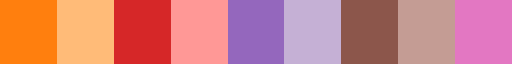

In [37]:
cmap

In [77]:
roc.head()

,program,gate,type,sensitivity,specificity,threshold
0,TEMRA,CD8_TEMRA,usages,0.000000,1.000000,1.978123
1,TEMRA,CD8_TEMRA,usages,0.000059,1.000000,0.978123
2,TEMRA,CD8_TEMRA,usages,0.000059,0.999997,0.851769
3,TEMRA,CD8_TEMRA,usages,0.000118,0.999997,0.828796
4,TEMRA,CD8_TEMRA,usages,0.000118,0.999981,0.773395


In [78]:

roc_multi.head()

,gate,sensitivity,specificity
0,CD4_CM,0.000000,1.000000
1,CD4_CM,0.000000,0.999996
2,CD4_CM,0.000035,0.999996
3,CD4_CM,0.000035,0.999993
4,CD4_CM,0.000142,0.999993


In [79]:
predroc_multi.head()

,gate,sensitivity,specificity,accuracy
CD4_CM,CD4_CM,0.583763,0.952060,0.767912
CD4_EM,CD4_EM,0.674926,0.939272,0.807099
CD4_Naive,CD4_Naive,0.925876,0.958543,0.942209
CD8_CM,CD8_CM,0.441103,0.965093,0.703098
CD8_EM,CD8_EM,0.527026,0.979648,0.753337


In [38]:
gate_list_order = [
 'CD4_Naive',
 'CD4_CM',
 'CD4_EM',
 'Treg',
 'CD8_Naive',
'CD8_CM',
 'CD8_EM',
 'CD8_TEMRA',    
     'MAIT',
 'gdT',
                  ]

In [81]:
sns.color_palette("tab20")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

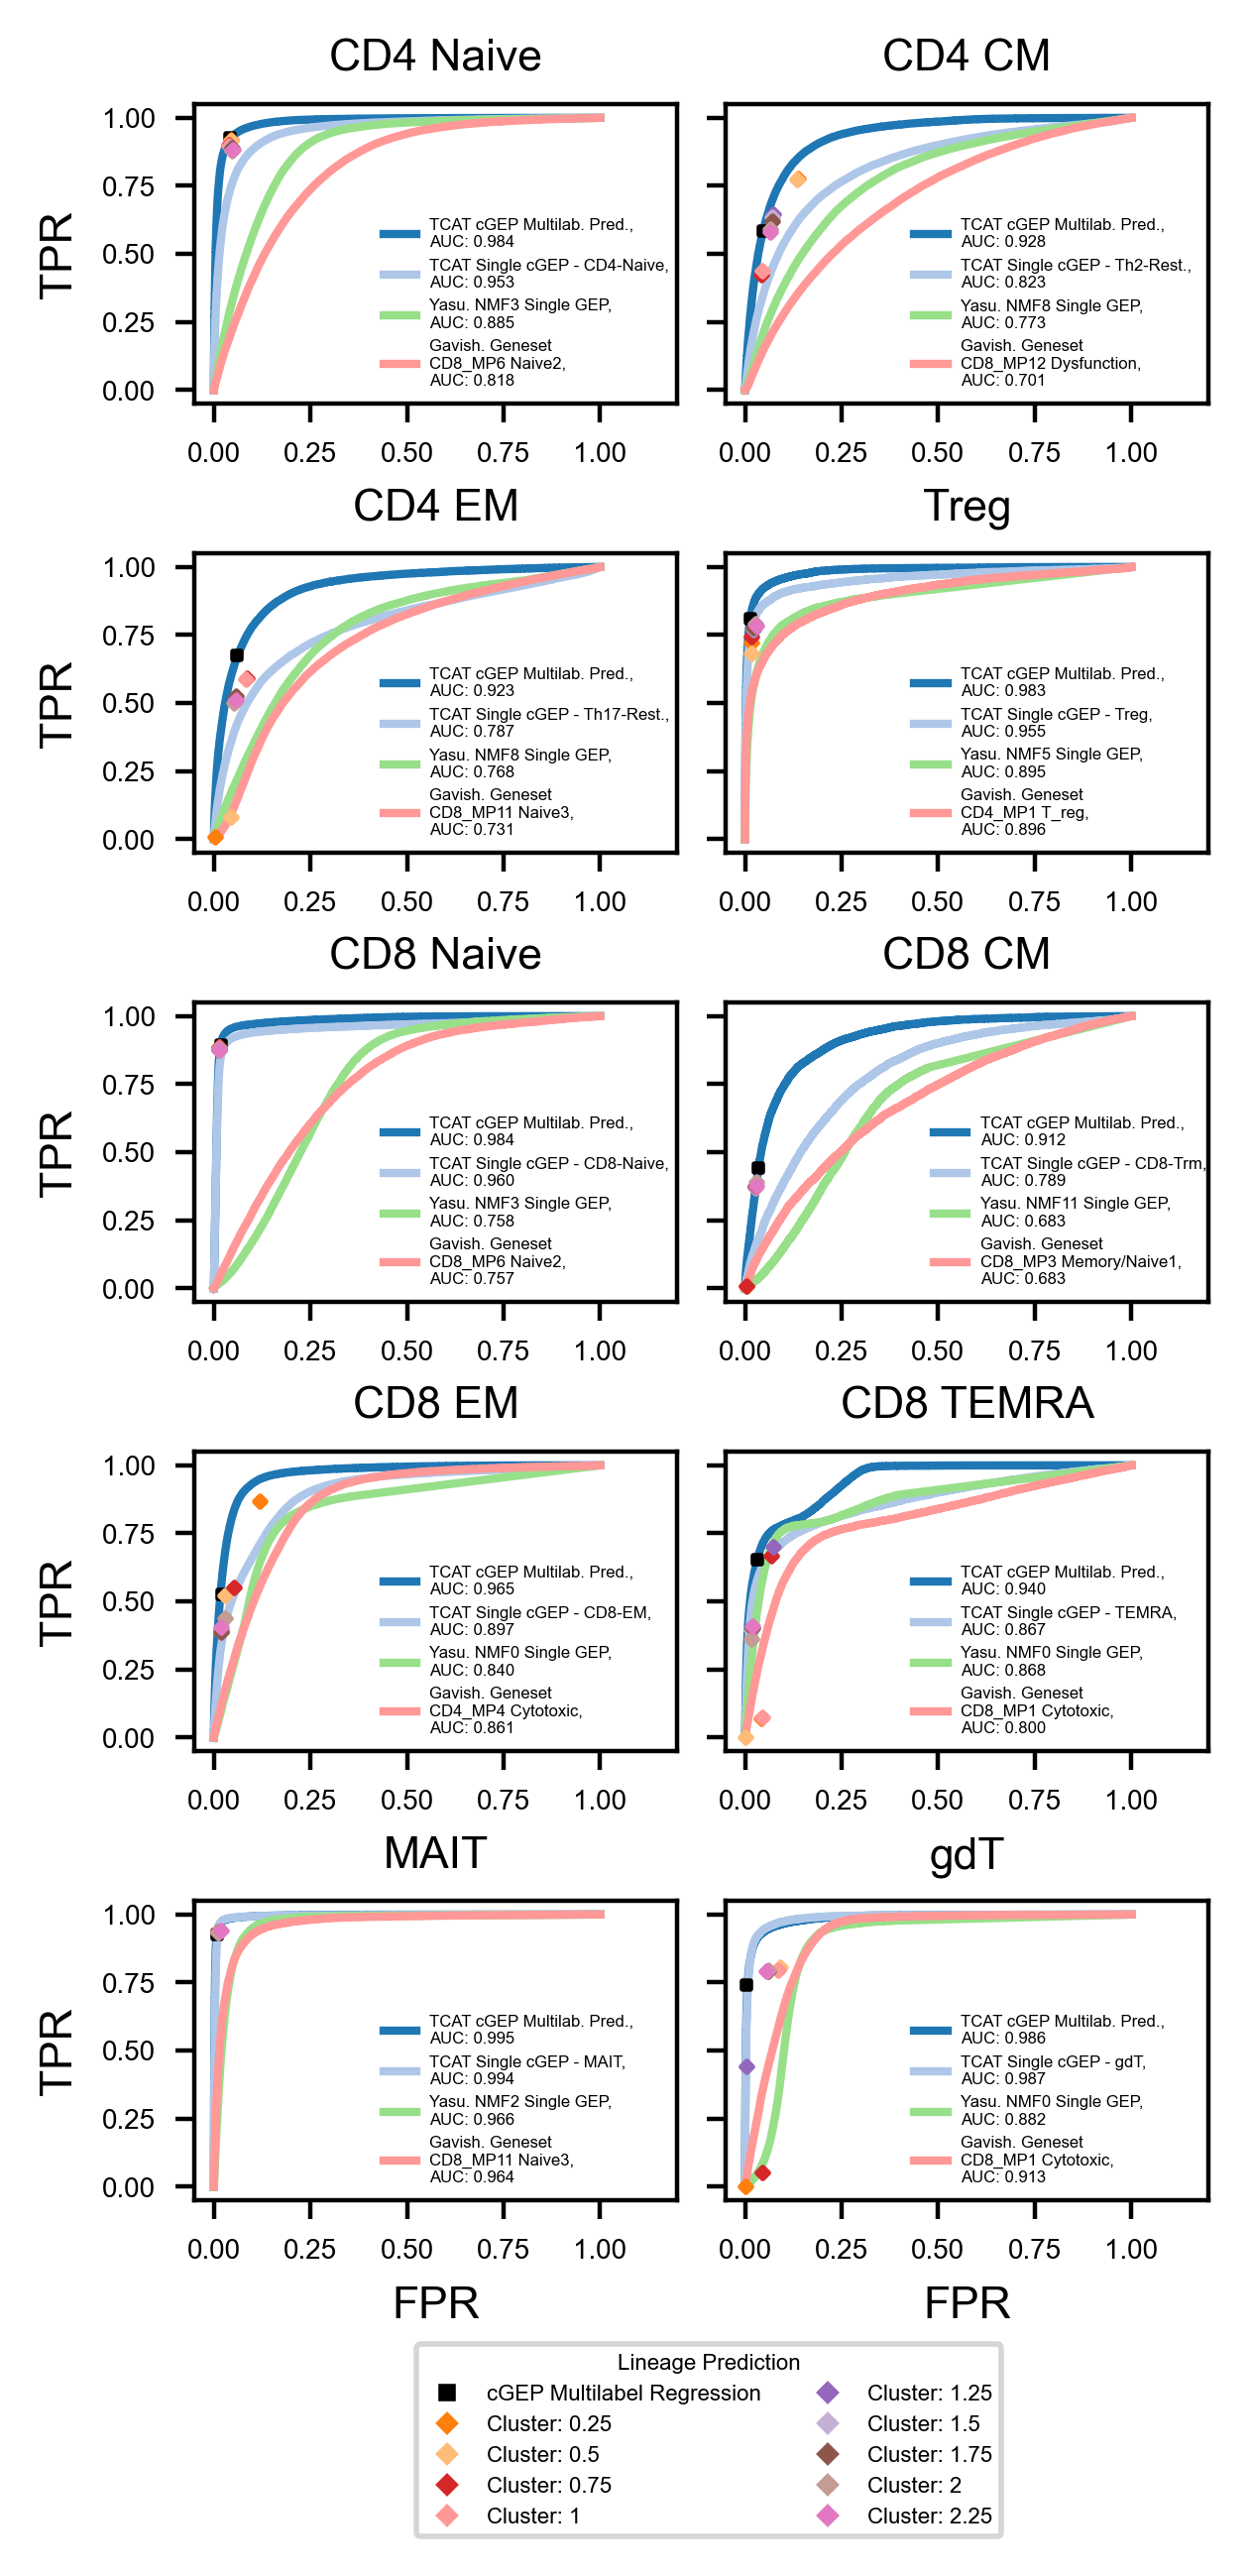

In [52]:
wspace = 0.1
hspace = 0.5
ncol = 2
nrow = 5
figsize = (3.3, 7)
tick_fontsize = 5
dpi = 400
legend_fontsize = 3
label_fontsize = 8

fig, ax = plt.subplots(nrows = nrow, ncols = ncol, 
                       gridspec_kw ={'wspace': wspace, 'hspace': hspace}, 
                       dpi = dpi, figsize = figsize, sharey=True)

for n, gate in enumerate(gate_list_order):
    # gate = prg_dict[prg][0]
    k = (n)%ncol
    j = (n)//ncol
    
    roc_yasu = yasumizu_roc
    auc_yasu = yasumizu_auc
    roc_yasu_multi = yasumizu_roc_multi
    auc_yasu_multi = yasumizu_auc_multi
    
    # print(gate, n, j, k)

    auc_labels = [
            
            ',\nAUC: %.3f' % auc_multi.loc[(auc_multi['gate']==gate), 'auc'], 
            # ',\nAUC: %.3f' % auc_yasu_multi.loc[(auc_yasu_multi['gate']==gate), 'auc'],                               
            
            ',\nAUC: %.3f' % auc.loc[(auc['gate']==gate) & (auc['type']=='usages'), 'auc'], 
            ',\nAUC: %.3f' % auc_yasu.loc[(auc_yasu['gate']==gate), 'auc'],                   
            ',\nAUC: %.3f' % gavish_auc.loc[(gavish_auc['gate']==gate), 'auc'],                   

        '', ''] + ['']*len(clus_resolutions)
    

    ax[j, k].plot(1 - roc_multi[(roc_multi['gate']==gate)]['specificity'], 
               roc_multi[(roc_multi['gate']==gate)]['sensitivity'], color= sns.color_palette("tab20")[0],
               alpha = 1, label = 'TCAT cGEP Multilab. Pred.', zorder = 1)
    
        
    # lab = 'Yasu. Multilab. Pred.'
    # ax[j, k].plot(1 - roc_yasu_multi[(roc_yasu_multi['gate']==gate)]['specificity'], 
    #            roc_yasu_multi[(roc_yasu_multi['gate']==gate)]['sensitivity'], 
    #            alpha = 1, color= sns.color_palette("tab20")[4],
    #             label = lab,
    #             zorder = 2)     
    
    
    gep = auc.loc[(auc['gate']==gate), 'program'].values[0]
    ax[j, k].plot(1 - roc[(roc['gate']==gate) & (roc['type']=='usages')]['specificity'], 
               roc[(roc['gate']==gate) & (roc['type']=='usages')]['sensitivity'], color=sns.color_palette("tab20")[1],
               alpha = 1, label = 'TCAT Single cGEP - %s' % gep.replace('Resting', 'Rest.'),
                  zorder = 2)

    
    lab = 'Yasu. %s Single GEP' % auc_yasu.loc[(auc_yasu['gate']==gate), 'program'].values[0].split(' ')[0]
    ax[j, k].plot(1 - roc_yasu[(roc_yasu['gate']==gate) & (roc_yasu['type']=='usages')]['specificity'], 
               roc_yasu[(roc_yasu['gate']==gate) & (roc_yasu['type']=='usages')]['sensitivity'], 
               alpha = 1, color= sns.color_palette("tab20")[5],
                label = lab,
                zorder = 2)    
    
    
    lab = 'Gavish. Geneset\n%s' % gavish_auc.loc[(gavish_auc['gate']==gate), 'program'].iloc[0]
    ax[j, k].plot(1 - gavish_roc[(gavish_roc['gate']==gate) & (gavish_roc['type']=='usages')]['specificity'], 
               gavish_roc[(gavish_roc['gate']==gate) & (gavish_roc['type']=='usages')]['sensitivity'], 
               alpha = 1, color= sns.color_palette("tab20")[7],
                label = lab,
                zorder = 2)       
    
    ax[j, k].scatter(1 - predroc_multi[predroc_multi['gate']==gate]['specificity'],
               predroc_multi[predroc_multi['gate']==gate]['sensitivity'], 
               alpha = 1, color = 'black', #label = 'cGEP Logistic Regression-\nPredicted Lineage',
                     s = 2, marker = 's', 
              zorder = 10)


    # ax[j, k].scatter(1 - max_identity_roc_plot[max_identity_roc_plot['gate']==gate]['specificity'],
    #            max_identity_roc_plot[max_identity_roc_plot['gate']==gate]['sensitivity'], 
    #            alpha = 1, color = 'black', label = 'Max Identity GEP', s = 2, marker = 's', 
    #           zorder = 10)

    texts=[]

    for i, rna_cluster_col in enumerate(clus_resolutions):
        rna_clus_roc_plot = rna_clus_accuracy[rna_clus_accuracy['cluster_col']==rna_cluster_col]
        
        ax[j, k].scatter(1 - rna_clus_roc_plot[rna_clus_roc_plot['gate']==gate]['specificity'],
                   rna_clus_roc_plot[rna_clus_roc_plot['gate']==gate]['sensitivity'], 
                   alpha = 1, color = cmap(i),# label = rna_cluster_col,
                         s = 2, marker = 'D', zorder = 10)
        
    if gate != 'CD8_CM':
        auc_legend = ax[j, k].legend(fontsize = legend_fontsize, labels = ["{}{}".format(a, b) for a, b in 
                  zip(ax[j, k].get_legend_handles_labels()[1], auc_labels)], frameon=False, bbox_to_anchor=(0.36, 0.67))
    else:
         auc_legend = ax[j, k].legend(fontsize = legend_fontsize, labels = ["{}{}".format(a, b) for a, b in 
                  zip(ax[j, k].get_legend_handles_labels()[1], auc_labels)], frameon=False, bbox_to_anchor=(0.4, 0.67))       
                                 
    ax[j, k].tick_params('both', labelsize=tick_fontsize)
    ax[j,k].set_xlim([-.05, 1.2])

    
    if k==0:
        ax[j, k].set_ylabel('TPR', fontsize = label_fontsize)
    if j==nrow-1:
        ax[j, k].set_xlabel('FPR', fontsize = label_fontsize)
    
    ax[j, k].set_title(gate.replace('_', ' '), fontsize = label_fontsize)#, y = 1.05)
    # ax[j, k].text(x = .1, y = 0.03, #1.03, 
    #               s = ''.join(['Regression Variables:\n',
    #                            roc_steplog[(roc_steplog['gate']==gate)]['features_renamed'].unique()[0].replace(',', ', ')]), 
    #               transform=ax[j, k].transAxes, fontsize = 4)

handles = [plt.plot([],[], color='black', marker="s", ms=2, ls="")[0]]
handles += [plt.plot([],[], color=cmap(i), marker="D", ms=2, ls="")[0] for (i, rna_cluster_col) in enumerate(clus_resolutions)]
cluster_legend = plt.legend(handles = handles, 
        labels = ['cGEP Multilabel Regression'] 
                            + ['Cluster: %s' % res.split('res')[1].replace('_', '.') for res in clus_resolutions],                            
          bbox_to_anchor=(0.75, 0, #0.9125,
                          0, 0.15), bbox_transform=plt.gcf().transFigure, 
           loc='lower right', fontsize = legend_fontsize+1, ncol = 2, title = 'Lineage Prediction',
                           title_fontsize = legend_fontsize+1)

ax[j, k].add_artist(auc_legend)
plt.savefig(os.path.join(figdir, 'SparksROCCurve_withYasumizu.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'SparksROCCurve_withYasumizu.pdf'), bbox_inches="tight")

In [83]:
clus_resolutions

['leiden_res0_25',
 'leiden_res0_5',
 'leiden_res0_75',
 'leiden_res1',
 'leiden_res1_25',
 'leiden_res1_5',
 'leiden_res1_75',
 'leiden_res2',
 'leiden_res2_25']

In [84]:
cmap = plt.get_cmap('tab20_r', len(clus_resolutions)+6)

for i, rna_cluster_col in enumerate(clus_resolutions):
    print(cmap(i))

(0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)
(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)
(0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0)
(0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0)
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
(0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0)
(0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0)
(0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0)
(0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)


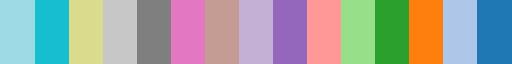

In [85]:
cmap

In [86]:
gate_list

['CD8_TEMRA',
 'gdT',
 'CD8_Naive',
 'Treg',
 'CD8_EM',
 'CD4_EM',
 'CD4_Naive',
 'CD4_CM',
 'MAIT',
 'CD8_CM']

# Plot AUC/ROC summary stats

## AUC barplots

In [71]:
auc['label']='TCAT Single cGEP'
auc_multi['label'] = 'TCAT cGEP Multilabel Prediction'

In [72]:
auc

,program,gate,type,auc,label
0,TEMRA,CD8_TEMRA,usages,0.867251,TCAT Single cGEP
1,gdT,gdT,usages,0.986851,TCAT Single cGEP
2,CD8-Naive,CD8_Naive,usages,0.960151,TCAT Single cGEP
3,Treg,Treg,usages,0.954664,TCAT Single cGEP
4,CD8-EM,CD8_EM,usages,0.896949,TCAT Single cGEP
5,Th17-Resting,CD4_EM,usages,0.787439,TCAT Single cGEP
6,CD4-Naive,CD4_Naive,usages,0.952606,TCAT Single cGEP
7,Th2-Resting,CD4_CM,usages,0.823162,TCAT Single cGEP
8,MAIT,MAIT,usages,0.993953,TCAT Single cGEP
9,CD8-Trm,CD8_CM,usages,0.789419,TCAT Single cGEP


In [73]:
auc_all = pd.concat([
                     auc_multi[['gate', 'auc', 'label']],
                    auc[['gate', 'auc', 'label']]
                    ])
# auc_all['label'] = auc_all['label'].replace({'cGEP Logistic\nRegression':'TCAT Multilabel\nPrediction'})
# auc_all.index = auc_all['type']

In [74]:
gate_order = auc_all.groupby('gate').mean()['auc'].sort_values(ascending = False).index

In [76]:
tick_fontsize = 8
label_fontsize =10

In [78]:
auc_all = pd.concat([auc_multi[['gate', 'auc', 'label']],
                    auc[['gate', 'auc', 'label']]
                    ])
auc_all['label'] = auc_all['label'].replace({'TCAT cGEP Multilabel Prediction':
                                             'TCAT cGEP\nMultilabel Pred.'})
auc_all['label'] = auc_all['label'].replace({'TCAT Single cGEP':
                                             'TCAT Single\ncGEP'})

x = yasumizu_auc[['gate', 'auc']]
x['label'] = 'Yasumizu et. al.\nSingle GEP'
# y = yasumizu_auc_multi
# y['label'] = 'Yasumizu et. al.\nMultilabel Pred.'
z = gavish_auc
z['label'] = 'Gavish et. al.\nGeneset Pred.'

auc_all = pd.concat([auc_all, #y, 
                     x, z], axis=0)

/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


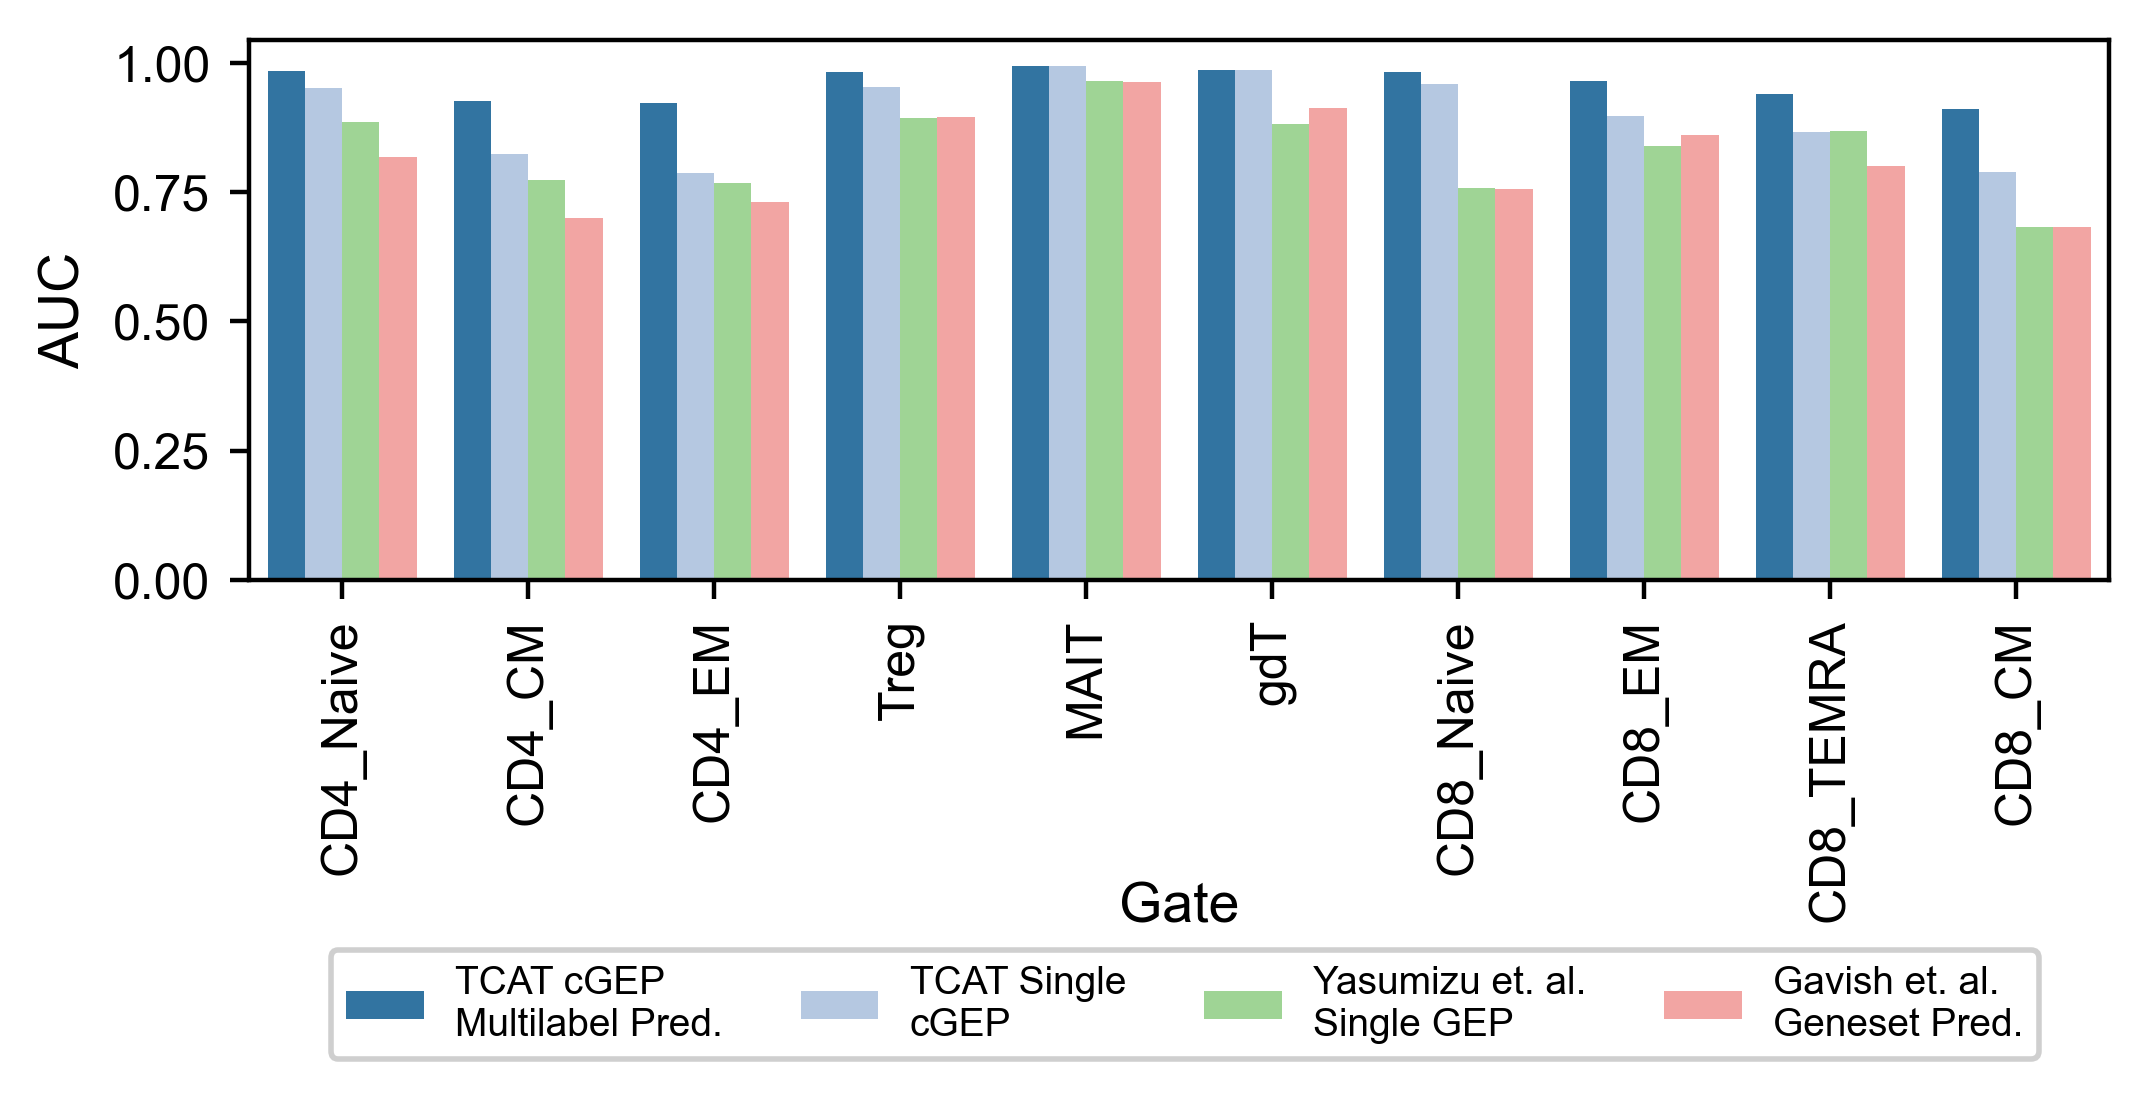

In [89]:
gate_order_new = [ 'CD4_Naive', 'CD4_CM', 'CD4_EM', 'Treg',
                  'MAIT', 'gdT', 'CD8_Naive', 'CD8_EM', 'CD8_TEMRA', 'CD8_CM']

fig, ax = plt.subplots(figsize = (6,3), dpi = 400, gridspec_kw={'bottom':.5, 'top':.95})
sns.barplot(data=auc_all, x='gate', y='auc', hue='label', order =gate_order_new,
            ax = ax, palette = np.array(sns.color_palette("tab20"))[[0, 1, 5, 7]])
ax.legend(#loc = 'lower right',
          fontsize = 7, #fancybox=True, 
          framealpha = .925,
    bbox_to_anchor=(.9725, -.65), ncol=4
)
ax.set_xlabel('Gate', labelpad=-7,)
ax.set_ylabel('AUC')

ax.tick_params(axis = 'x', rotation = 90)
ax.tick_params(axis = 'both', labelsize = 9)

plt.savefig(os.path.join(figdir, 'AUCBarplot_SparksGating_Yasumizu.png'))
plt.savefig(os.path.join(figdir, 'AUCBarplot_SparksGating_Yasumizu.pdf'))

## Accuracy barplots

In [53]:
metarnaclust = pd.read_csv(paths['Metadata_RNAClustering'], index_col = 0, sep = '\t')

/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
for cluster_col in clus_resolutions:
    print(len(metarnaclust[cluster_col].unique()))

11
13
14
16
20
22
25
28
29


In [100]:
clus_resolutions

['leiden_res0_25',
 'leiden_res0_5',
 'leiden_res0_75',
 'leiden_res1',
 'leiden_res1_25',
 'leiden_res1_5',
 'leiden_res1_75',
 'leiden_res2',
 'leiden_res2_25']

In [55]:
accuracy = pd.read_csv(paths['accuracy'], index_col = 0, sep='\t')

accuracy = accuracy[['multi_log_reg', 'usage'] + clus_resolutions] #accuracy[['multi_log_reg', 'usage', 'rna_clus', 'adt_clus']] # Reorder



In [102]:
accuracy

,multi_log_reg,usage,leiden_res0_25,leiden_res0_5,leiden_res0_75,leiden_res1,leiden_res1_25,leiden_res1_5,leiden_res1_75,leiden_res2,leiden_res2_25
CD8_TEMRA,0.810238,0.810091,0.514592,0.500107,0.800397,0.514938,0.814537,0.688874,0.691931,0.673143,0.696331
gdT,0.867530,0.925640,0.499973,0.859137,0.504106,0.855143,0.718032,0.865999,0.866552,0.867731,0.866959
CD8_Naive,0.936856,0.761947,0.936225,0.936696,0.936619,0.934459,0.933423,0.932648,0.931848,0.931320,0.930911
Treg,0.898201,0.901942,0.853389,0.832806,0.862894,0.874646,0.874352,0.875552,0.876894,0.881140,0.878784
CD8_EM,0.753337,0.821130,0.875325,0.746773,0.748709,0.684584,0.686760,0.686129,0.684074,0.704791,0.692788
CD4_EM,0.807099,0.716067,0.502696,0.517207,0.753395,0.751980,0.726914,0.729600,0.733057,0.724038,0.726922
CD4_Naive,0.942209,0.777708,0.937993,0.936607,0.931519,0.929265,0.923925,0.921786,0.920456,0.917066,0.916368
CD4_CM,0.767912,0.713330,0.818956,0.819542,0.690778,0.697516,0.787877,0.781952,0.775162,0.763058,0.757515
MAIT,0.958227,0.954271,0.962845,0.963739,0.963087,0.963783,0.961879,0.961819,0.961422,0.960958,0.960320
CD8_CM,0.703098,0.661891,0.502595,0.502642,0.502495,0.670811,0.673000,0.672706,0.675562,0.680396,0.673859


In [56]:
tick_fontsize = 8
label_fontsize =10

In [104]:
accuracy

,multi_log_reg,usage,leiden_res0_25,leiden_res0_5,leiden_res0_75,leiden_res1,leiden_res1_25,leiden_res1_5,leiden_res1_75,leiden_res2,leiden_res2_25
CD8_TEMRA,0.810238,0.810091,0.514592,0.500107,0.800397,0.514938,0.814537,0.688874,0.691931,0.673143,0.696331
gdT,0.867530,0.925640,0.499973,0.859137,0.504106,0.855143,0.718032,0.865999,0.866552,0.867731,0.866959
CD8_Naive,0.936856,0.761947,0.936225,0.936696,0.936619,0.934459,0.933423,0.932648,0.931848,0.931320,0.930911
Treg,0.898201,0.901942,0.853389,0.832806,0.862894,0.874646,0.874352,0.875552,0.876894,0.881140,0.878784
CD8_EM,0.753337,0.821130,0.875325,0.746773,0.748709,0.684584,0.686760,0.686129,0.684074,0.704791,0.692788
CD4_EM,0.807099,0.716067,0.502696,0.517207,0.753395,0.751980,0.726914,0.729600,0.733057,0.724038,0.726922
CD4_Naive,0.942209,0.777708,0.937993,0.936607,0.931519,0.929265,0.923925,0.921786,0.920456,0.917066,0.916368
CD4_CM,0.767912,0.713330,0.818956,0.819542,0.690778,0.697516,0.787877,0.781952,0.775162,0.763058,0.757515
MAIT,0.958227,0.954271,0.962845,0.963739,0.963087,0.963783,0.961879,0.961819,0.961422,0.960958,0.960320
CD8_CM,0.703098,0.661891,0.502595,0.502642,0.502495,0.670811,0.673000,0.672706,0.675562,0.680396,0.673859


In [57]:
accuracy_plot = accuracy.unstack().reset_index()
accuracy_plot.columns = ['name', 'gate', 'value']

In [58]:
acc_label_map = {'usage' : 'TCAT Single cGEP', 
                'multi_log_reg' : 'TCAT cGEP Multilabel Prediction',
                # 'rna_clus' : 'RNA Cluster',
                'adt_clus' : 'RNA+ADT Cluster'
                }

accuracy_plot['label'] = accuracy_plot['name'].replace(acc_label_map)
accuracy_plot['label'] = accuracy_plot['label'].str.replace('leiden_', 'RNA Cluster ')

In [107]:
# gate_order_accuracy = list(accuracy_plot.groupby('gate').max().sort_values('value', ascending = False).index)

In [108]:
(3.3,2.1)

(3.3, 2.1)

In [59]:
fontsize = label_fontsize

In [60]:
tab20 = plt.get_cmap('tab20')

from matplotlib.colors import ListedColormap

# convert to matplotlib colormap
cmap = ListedColormap([c for n, c in enumerate(tab20.colors) if n not in [0, 1, 4, 5]], 
                      name='', N=len(clus_resolutions))


In [61]:
accuracy_plot

,name,gate,value,label
0,multi_log_reg,CD8_TEMRA,0.810238,TCAT cGEP Multilabel Prediction
1,multi_log_reg,gdT,0.867530,TCAT cGEP Multilabel Prediction
2,multi_log_reg,CD8_Naive,0.936856,TCAT cGEP Multilabel Prediction
3,multi_log_reg,Treg,0.898201,TCAT cGEP Multilabel Prediction
4,multi_log_reg,CD8_EM,0.753337,TCAT cGEP Multilabel Prediction
...,...,...,...,...
105,leiden_res2_25,CD4_EM,0.726922,RNA Cluster res2_25
106,leiden_res2_25,CD4_Naive,0.916368,RNA Cluster res2_25
107,leiden_res2_25,CD4_CM,0.757515,RNA Cluster res2_25
108,leiden_res2_25,MAIT,0.960320,RNA Cluster res2_25


In [112]:
dict(zip(accuracy_plot['name'], accuracy_plot['label']))

{'multi_log_reg': 'TCAT cGEP Multilabel Prediction',
 'usage': 'TCAT Single cGEP',
 'leiden_res0_25': 'RNA Cluster res0_25',
 'leiden_res0_5': 'RNA Cluster res0_5',
 'leiden_res0_75': 'RNA Cluster res0_75',
 'leiden_res1': 'RNA Cluster res1',
 'leiden_res1_25': 'RNA Cluster res1_25',
 'leiden_res1_5': 'RNA Cluster res1_5',
 'leiden_res1_75': 'RNA Cluster res1_75',
 'leiden_res2': 'RNA Cluster res2',
 'leiden_res2_25': 'RNA Cluster res2_25'}

In [62]:
clus_pal = {clus: cmap(n) for n, clus in enumerate(clus_resolutions)}

clus_pal['multi_log_reg'] = tab20(0)
clus_pal['usage'] = tab20(1)

In [63]:
tab20(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [115]:
accuracy_plot['name'].unique()

array(['multi_log_reg', 'usage', 'leiden_res0_25', 'leiden_res0_5',
       'leiden_res0_75', 'leiden_res1', 'leiden_res1_25', 'leiden_res1_5',
       'leiden_res1_75', 'leiden_res2', 'leiden_res2_25'], dtype=object)

In [116]:
gate_order

Index(['MAIT', 'gdT', 'CD8_Naive', 'Treg', 'CD4_Naive', 'CD8_EM', 'CD8_TEMRA',
       'CD4_CM', 'CD4_EM', 'CD8_CM'],
      dtype='object', name='gate')

In [64]:
accuracy_plot_relab = accuracy_plot.copy()
ind = accuracy_plot_relab['label'].apply(lambda x: 'res' in x)
accuracy_plot_relab.loc[ind, 'label'] = 'Cluster: ' + accuracy_plot_relab.loc[ind, 'label'].apply(lambda x: x.split('res')[1].replace('_', '.'))
accuracy_plot_relab['label'].unique()

array(['TCAT cGEP Multilabel Prediction', 'TCAT Single cGEP',
       'Cluster: 0.25', 'Cluster: 0.5', 'Cluster: 0.75', 'Cluster: 1',
       'Cluster: 1.25', 'Cluster: 1.5', 'Cluster: 1.75', 'Cluster: 2',
       'Cluster: 2.25'], dtype=object)

In [65]:
accuracy_plot_relab['gate_rename'] = accuracy_plot_relab['gate'].apply(lambda x: x.replace('_', ' '))

In [66]:
clus_pal_relabel = dict(zip(pd.Series(clus_pal.keys()).map(dict(zip(accuracy_plot_relab['name'], accuracy_plot_relab['label']))),
                                               clus_pal.values()))

In [120]:
label_fontsize

10

In [121]:
gate_order

Index(['MAIT', 'gdT', 'CD8_Naive', 'Treg', 'CD4_Naive', 'CD8_EM', 'CD8_TEMRA',
       'CD4_CM', 'CD4_EM', 'CD8_CM'],
      dtype='object', name='gate')

Text(0, 0.5, 'Accuracy')

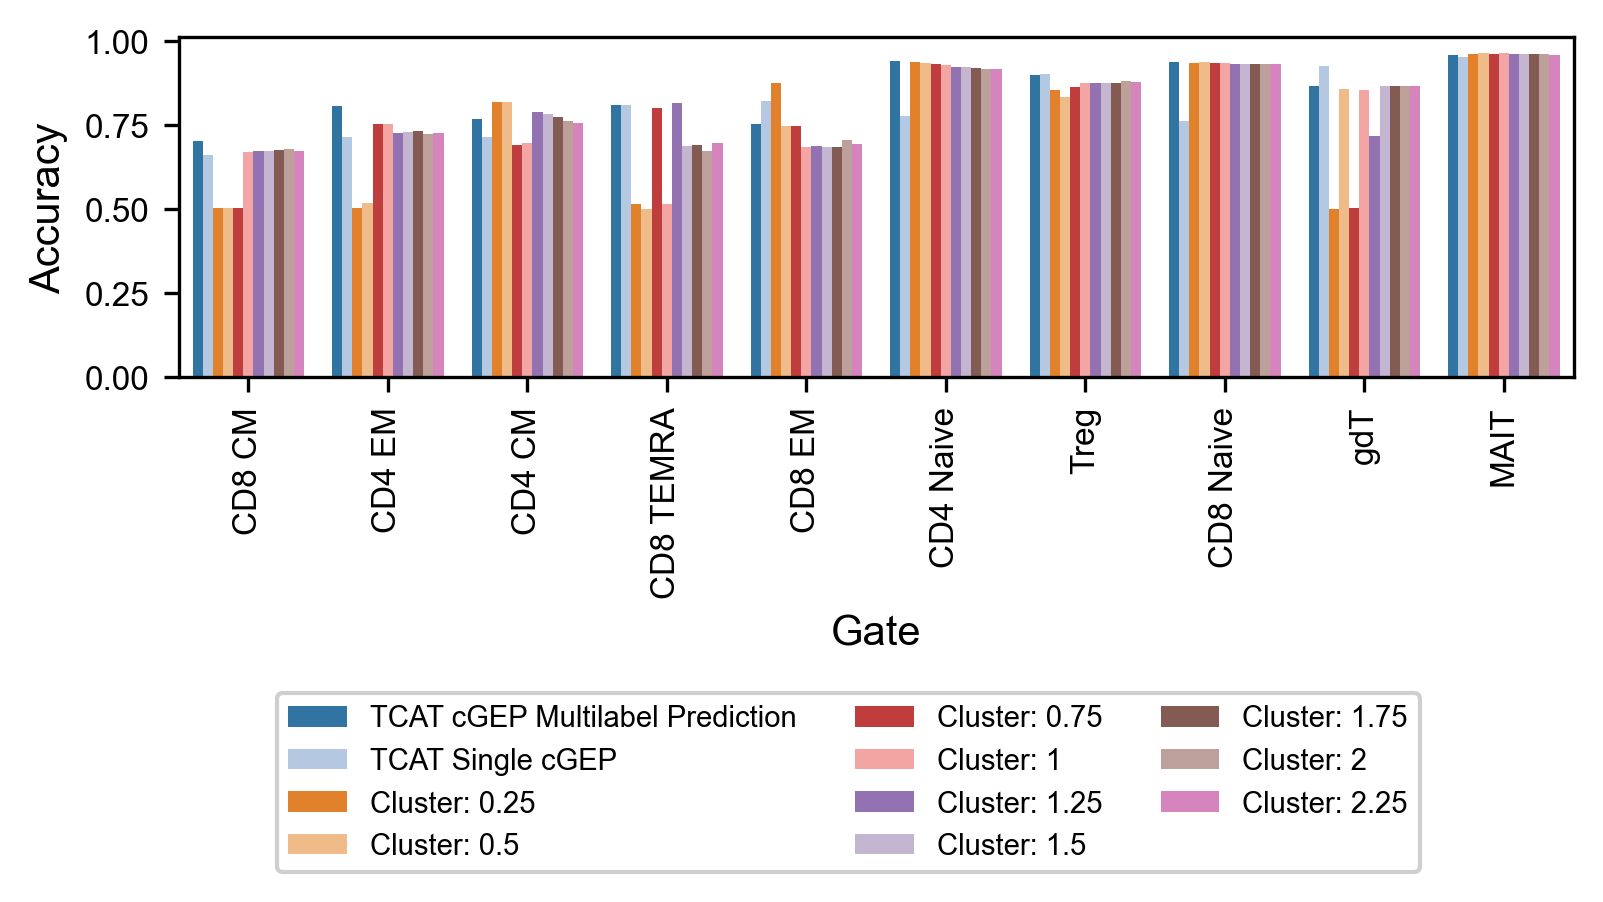

In [75]:
label_fontsize = 10
tick_fontsize=8
fig, ax = plt.subplots(figsize = (6,1.5), dpi = 300)
sns.barplot(data=accuracy_plot_relab, x='gate_rename', y='value', hue='label', order =list([x.replace('_', ' ') for x in reversed(gate_order)]),
            ax = ax, palette= clus_pal_relabel)
ax.legend(loc = 'lower right',fontsize = 7, #fancybox=True, 
          framealpha = .925, 
    bbox_to_anchor=(.9, -1.5),
          ncol = 3
)
ax.tick_params(axis = 'x', rotation = 90)
ax.tick_params('both', labelsize = tick_fontsize)
ax.set_xlabel('Gate', fontsize = label_fontsize)
ax.set_ylabel('Accuracy', fontsize = label_fontsize)

# plt.savefig(os.path.join(figdir, 'AccuracyBarplot_SparksGating.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'AccuracyBarplot_SparksGating.pdf'), bbox_inches="tight")

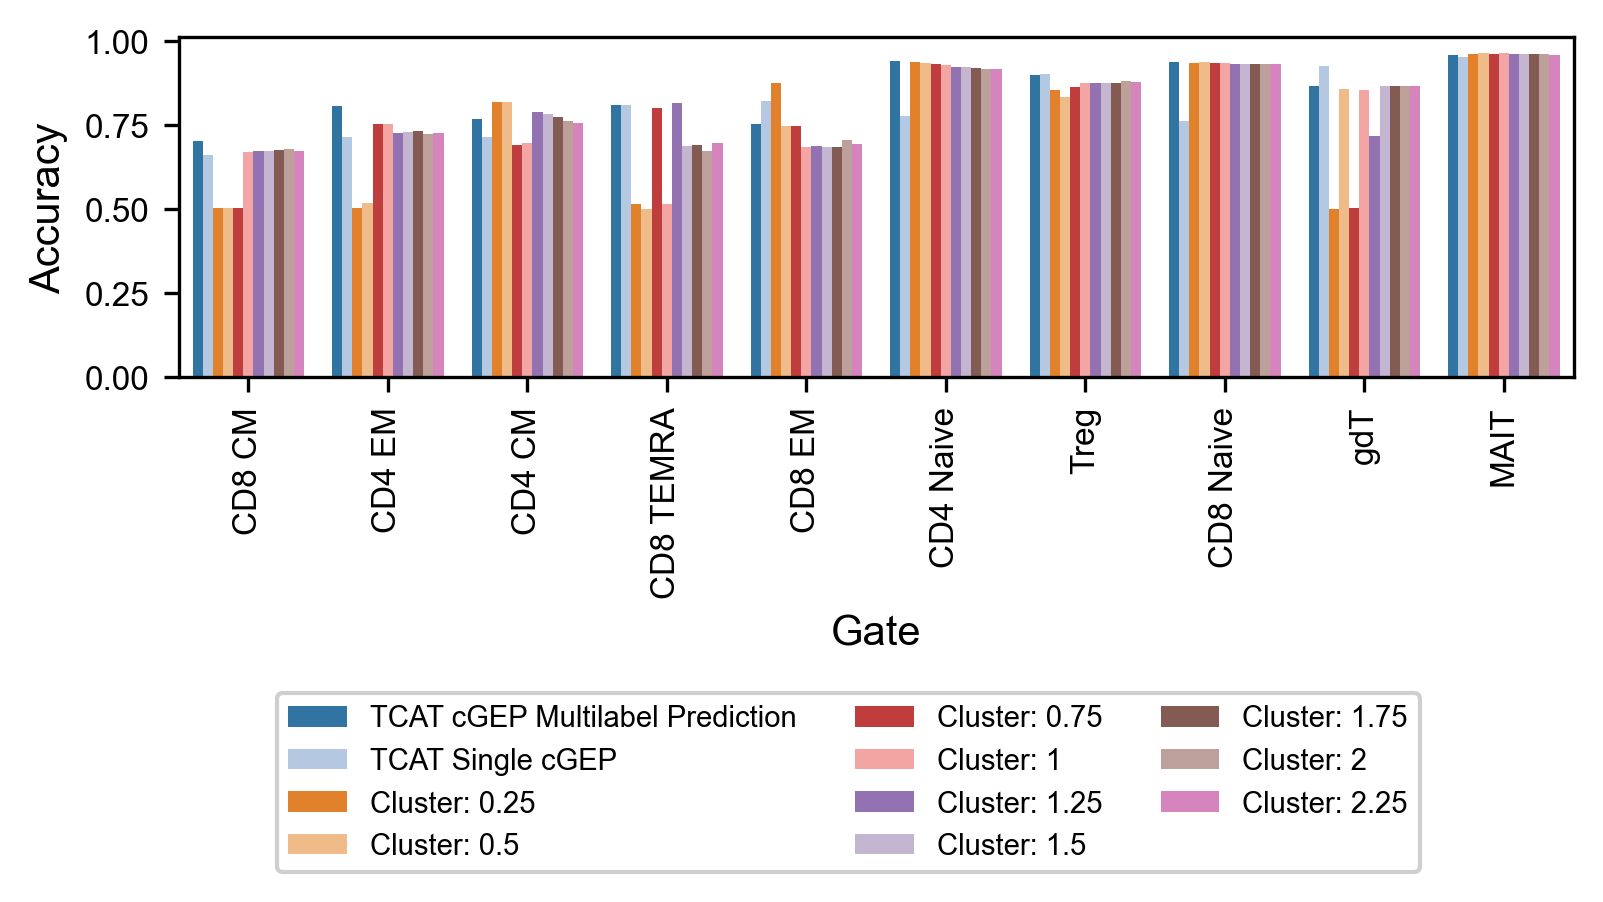

In [122]:
label_fontsize = 10
tick_fontsize=8
fig, ax = plt.subplots(figsize = (6,1.5), dpi = 300)
sns.barplot(data=accuracy_plot_relab, x='gate_rename', y='value', hue='label', order =list([x.replace('_', ' ') for x in reversed(gate_order)]),
            ax = ax, palette= clus_pal_relabel)
ax.legend(loc = 'lower right',fontsize = 7, #fancybox=True, 
          framealpha = .925, 
    bbox_to_anchor=(.9, -1.5),
          ncol = 3
)
ax.tick_params(axis = 'x', rotation = 90)
ax.tick_params('both', labelsize = tick_fontsize)
ax.set_xlabel('Gate', fontsize = label_fontsize)
ax.set_ylabel('Accuracy', fontsize = label_fontsize)

# plt.savefig(os.path.join(figdir, 'AccuracyBarplot_SparksGating.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'AccuracyBarplot_SparksGating.pdf'), bbox_inches="tight")

In [123]:
accuracy['rna_clus'] = accuracy.loc[:, 'leiden_res1']
accuracy

,multi_log_reg,usage,leiden_res0_25,leiden_res0_5,leiden_res0_75,leiden_res1,leiden_res1_25,leiden_res1_5,leiden_res1_75,leiden_res2,leiden_res2_25,rna_clus
CD8_TEMRA,0.810238,0.810091,0.514592,0.500107,0.800397,0.514938,0.814537,0.688874,0.691931,0.673143,0.696331,0.514938
gdT,0.867530,0.925640,0.499973,0.859137,0.504106,0.855143,0.718032,0.865999,0.866552,0.867731,0.866959,0.855143
CD8_Naive,0.936856,0.761947,0.936225,0.936696,0.936619,0.934459,0.933423,0.932648,0.931848,0.931320,0.930911,0.934459
Treg,0.898201,0.901942,0.853389,0.832806,0.862894,0.874646,0.874352,0.875552,0.876894,0.881140,0.878784,0.874646
CD8_EM,0.753337,0.821130,0.875325,0.746773,0.748709,0.684584,0.686760,0.686129,0.684074,0.704791,0.692788,0.684584
CD4_EM,0.807099,0.716067,0.502696,0.517207,0.753395,0.751980,0.726914,0.729600,0.733057,0.724038,0.726922,0.751980
CD4_Naive,0.942209,0.777708,0.937993,0.936607,0.931519,0.929265,0.923925,0.921786,0.920456,0.917066,0.916368,0.929265
CD4_CM,0.767912,0.713330,0.818956,0.819542,0.690778,0.697516,0.787877,0.781952,0.775162,0.763058,0.757515,0.697516
MAIT,0.958227,0.954271,0.962845,0.963739,0.963087,0.963783,0.961879,0.961819,0.961422,0.960958,0.960320,0.963783
CD8_CM,0.703098,0.661891,0.502595,0.502642,0.502495,0.670811,0.673000,0.672706,0.675562,0.680396,0.673859,0.670811


In [124]:

(accuracy.iloc[:, 2:-1] - accuracy['usage'].values.reshape(-1,1)).mean(axis=0).sort_values(ascending=True)

leiden_res0_25   -0.063943
leiden_res0_5    -0.042876
leiden_res0_75   -0.035002
leiden_res1      -0.016689
leiden_res1_25    0.005668
leiden_res2_25    0.005674
leiden_res2       0.005962
leiden_res1_75    0.007294
leiden_res1_5     0.007305
dtype: float64

In [125]:
(accuracy.iloc[:, 2:-1] - accuracy['multi_log_reg'].values.reshape(-1,1)).mean(axis=0).sort_values(ascending=False)

leiden_res1_5    -0.032764
leiden_res1_75   -0.032775
leiden_res2      -0.034107
leiden_res2_25   -0.034395
leiden_res1_25   -0.034401
leiden_res1      -0.056758
leiden_res0_75   -0.075071
leiden_res0_5    -0.082945
leiden_res0_25   -0.104012
dtype: float64

In [126]:
for gate in gate_list:
    print(gate)
    
    multi_rna = accuracy.loc[gate, 'multi_log_reg'] - accuracy.loc[gate, 'rna_clus']
    
    print('Multinomial - RNA Clustering Accuracy: %.3f' % multi_rna)
    
    print()

CD8_TEMRA
Multinomial - RNA Clustering Accuracy: 0.295

gdT
Multinomial - RNA Clustering Accuracy: 0.012

CD8_Naive
Multinomial - RNA Clustering Accuracy: 0.002

Treg
Multinomial - RNA Clustering Accuracy: 0.024

CD8_EM
Multinomial - RNA Clustering Accuracy: 0.069

CD4_EM
Multinomial - RNA Clustering Accuracy: 0.055

CD4_Naive
Multinomial - RNA Clustering Accuracy: 0.013

CD4_CM
Multinomial - RNA Clustering Accuracy: 0.070

MAIT
Multinomial - RNA Clustering Accuracy: -0.006

CD8_CM
Multinomial - RNA Clustering Accuracy: 0.032



# Plot UMAP comparisons

In [127]:
usage_thresh = 0.025


In [128]:
adata_RNA = sc.read(paths['RNA_LogTP10K_Varnorm_Harmony'])

Only considering the two last: ['.Harmony', '.h5ad'].
Only considering the two last: ['.Harmony', '.h5ad'].


In [129]:
adata_RNA.obsm['X_harmony_RNA_UMAP']

array([[ 0.6684848 , -0.36467004],
       [-2.6371474 ,  1.1763833 ],
       [-2.5204687 , -1.0384766 ],
       ...,
       [-3.0266395 ,  5.7161436 ],
       [ 2.1091728 ,  0.07431322],
       [ 2.0467412 ,  0.9867657 ]], dtype=float32)

Compare UMAPs based on:
1. RNA clustering 
2. ADT clustering
3. Gating
4. Continuous usage values
5. Usage thresholding
6. Logistic regression calls (?)

Color using:
1. Compare overlaps with gating
2. All just side-by-side

In [130]:
gate_list

['CD8_TEMRA',
 'gdT',
 'CD8_Naive',
 'Treg',
 'CD8_EM',
 'CD4_EM',
 'CD4_Naive',
 'CD4_CM',
 'MAIT',
 'CD8_CM']

In [131]:
# clus_resolutions = ['leiden_res0_5', 'leiden_res1', 'leiden_res2_25']
rna_cluster_col = 'leiden_res1'

In [132]:
# usage_thresh = 0.1


In [133]:
usage_thresh

0.025

In [134]:
# Subset to cells in the gates of interest only
ind = list(set(meta_test.index).intersection(usage_test.index).intersection(adata_RNA.obs.index))

In [135]:
umap = pd.DataFrame(adata_RNA.obsm['X_harmony_RNA_UMAP'], index = adata_RNA.obs.index,
                   columns = ['UMAP1', 'UMAP2'])
umap = umap.loc[ind, :]

In [136]:
gates_to_plot = gate_list#['Treg', 'CD8_EM']

In [137]:
gates_to_plot

['CD8_TEMRA',
 'gdT',
 'CD8_Naive',
 'Treg',
 'CD8_EM',
 'CD4_EM',
 'CD4_Naive',
 'CD4_CM',
 'MAIT',
 'CD8_CM']

In [138]:
meta.head().columns

Index(['alt.subject.id', 'visit', 'covid.diagnosis.start.date.to.sample.drawn',
       'group', 'sex', 'age', 'race', 'ethnicity', 'flu.vax.count.10yr',
       'vaccine', 'vaccine.side.effects', 'long.covid.symptoms', 'Batch',
       'nCount_RNA', 'nCount_HTO', 'nCount_CITE', 'nCount_RNA_largest.gene',
       'nCount_SCT', 'nFeature_RNA', 'nFeature_HTO', 'nFeature_CITE',
       'nFeature_SCT', 'percent.mt', 'percent.largest.gene',
       'coarse.cell.type', 'cell.type', 'HTO1', 'HTO2', 'HTO3', 'n_counts',
       'leiden_res1', 'leiden_res0_8', 'leiden_res0_6', 'leiden_res2_25',
       'leiden_res2', 'leiden_res1_75', 'leiden_res1_5', 'leiden_res1_25',
       'leiden_res0_75', 'leiden_res0_5', 'leiden_res0_25', 'alt.sample.id',
       'cell_gating'],
      dtype='object')

In [139]:
meta_test.shape, adata_RNA.shape

((326153, 43), (336739, 28402))

In [140]:
adata_RNA.obs['cell_gating'] = meta.loc[adata_RNA.obs.index, 'cell_gating'].apply(lambda x: x.replace('_', ' '))

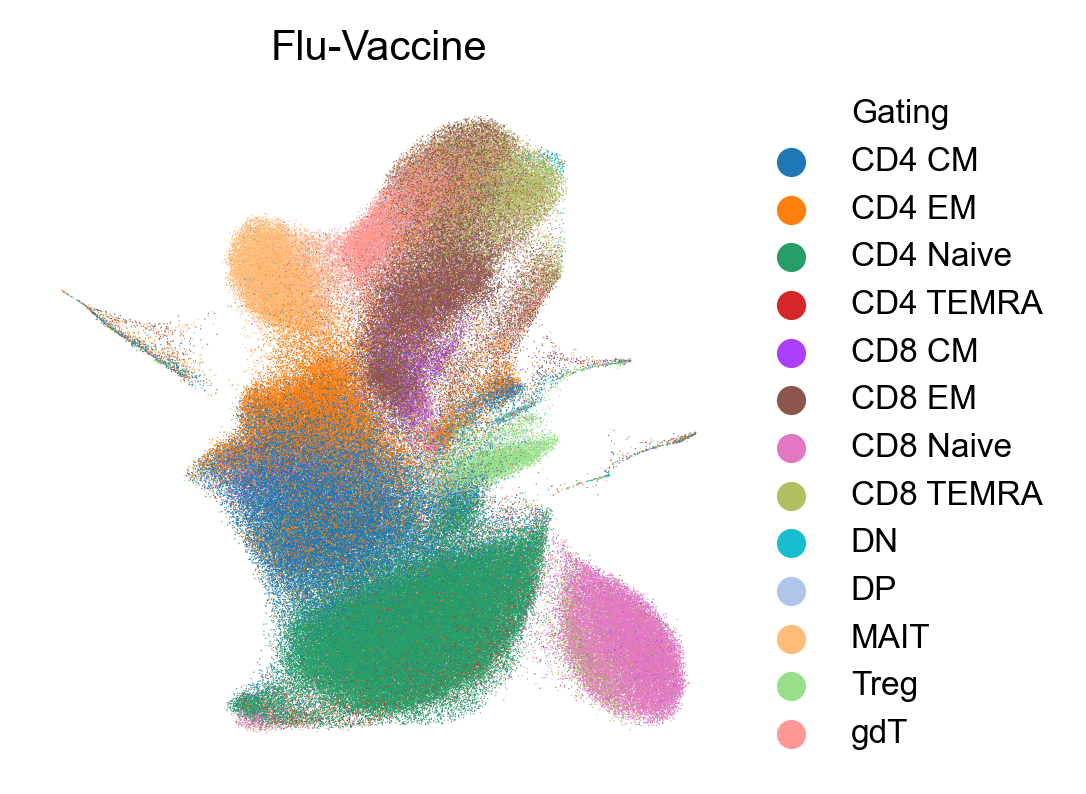

In [141]:
with plt.rc_context({'figure.dpi' : 300, 'figure.figsize' : (3, 3), 'legend.fontsize': tick_fontsize}):
    fig = sc.pl.umap(adata_RNA, color =  'cell_gating', return_fig = True, frameon = False,
                    legend_fontsize = tick_fontsize)
    ax = fig.get_axes()
    ax[0].set_title('Flu-Vaccine', fontsize = label_fontsize)
    
    legend = ax[0].get_legend()
    legend.set_title('Gating',  prop={'size':  tick_fontsize})
    
    fig.savefig(os.path.join(figdir, 'SparksUMAP.AllGating.png'), bbox_inches="tight")
    fig.savefig(os.path.join(figdir, 'SparksUMAP.AllGating.pdf'), bbox_inches="tight")
    


In [142]:
gating_cmap = dict(zip(sorted(adata_RNA.obs['cell_gating'].unique()), 
                       adata_RNA.uns['cell_gating_colors']))

In [143]:
gating_cmap

{'CD4 CM': '#1f77b4',
 'CD4 EM': '#ff7f0e',
 'CD4 Naive': '#279e68',
 'CD4 TEMRA': '#d62728',
 'CD8 CM': '#aa40fc',
 'CD8 EM': '#8c564b',
 'CD8 Naive': '#e377c2',
 'CD8 TEMRA': '#b5bd61',
 'DN': '#17becf',
 'DP': '#aec7e8',
 'MAIT': '#ffbb78',
 'Treg': '#98df8a',
 'gdT': '#ff9896'}

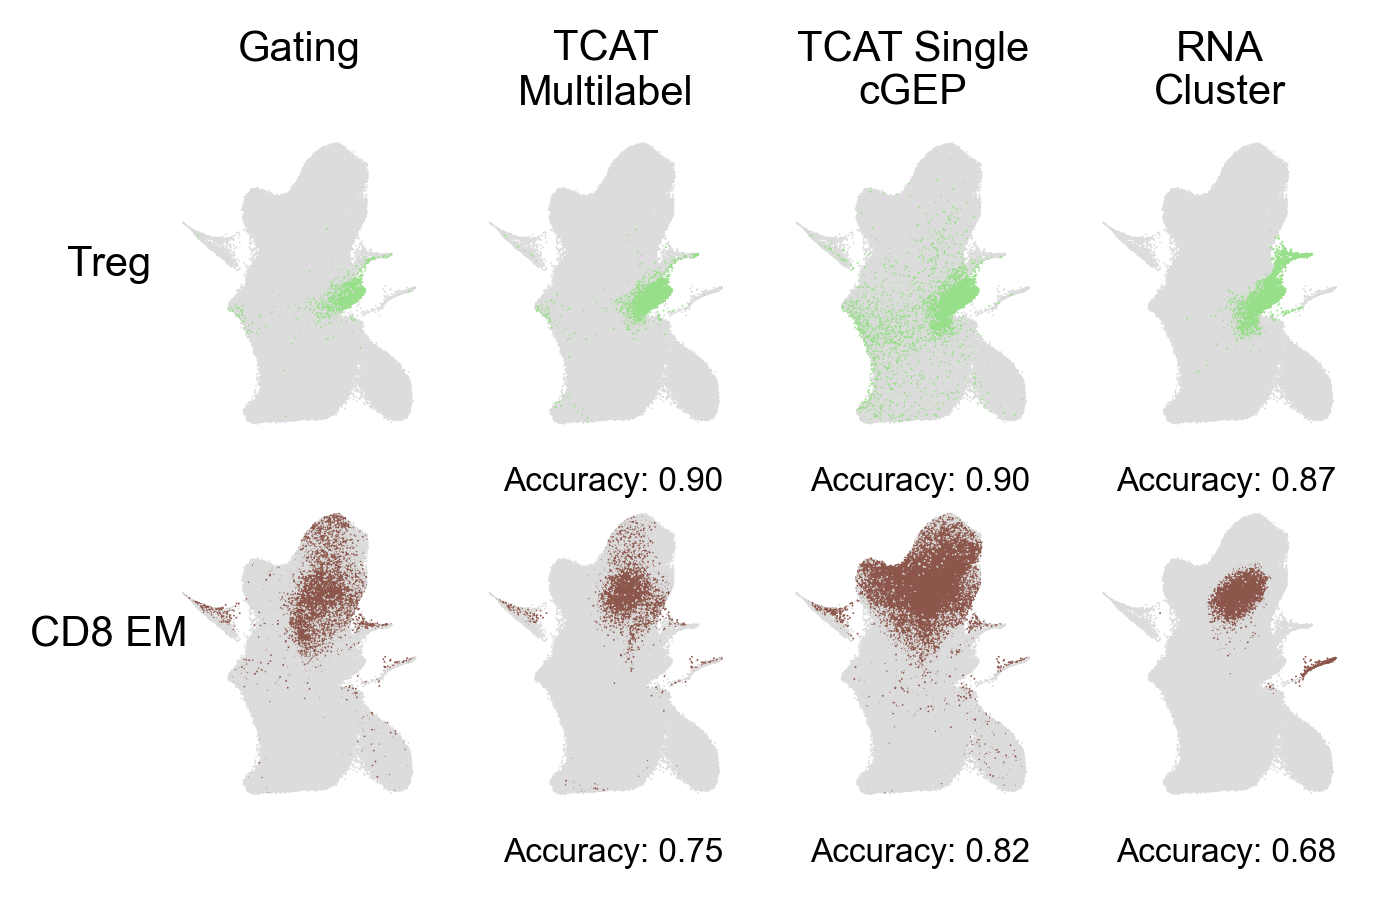

In [151]:
gates_to_plot = ['Treg', 'CD8_EM']
nrow = len(gates_to_plot)
ncol = 4
title_fontsize = 10
ylab_fontsize = 10

fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize = (ncol*7/5, 3), dpi = 300,
                      gridspec_kw={'left':.2})

for i, gate in enumerate(gates_to_plot):
    gep = roc[roc['gate']==gate]['program'].unique()[0] #gate_dict[gate][0]
    # i = n // ncol
    # j = n % ncol
    cmap_binary_gate = colors.LinearSegmentedColormap.from_list("", ["gainsboro", gating_cmap[gate.replace('_', ' ')]], N = 2)

    # Gating
    j = 0
    c = meta.loc[ind, 'cell_gating']==gate
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_ylabel('\n'+gate.replace('_', ' '), fontsize = ylab_fontsize, rotation = 0, labelpad=15)

    if i==0:
        ax[i, j].set_title('Gating\n', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)
        
        
    # Multinomial Logistic Regression
    j = 1
    c = pred_multi.loc[ind, :] == gate
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'multi_log_reg'], fontsize=8)
    
    if i==0:
        ax[i, j].set_title('TCAT\nMultilabel', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)

                
    # Thresholded usages  
    j = 2
    c = usage_test.loc[ind, gep] > usage_thresh
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'usage'], fontsize=8)
    
    if i==0:
        ax[i, j].set_title('TCAT Single\ncGEP', fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)


    # RNA cluster
    j = 3
    rna_clus_types = rna_clus_accuracy[rna_clus_accuracy['cluster_col']==rna_cluster_col]
    rna_clus_types = rna_clus_types.loc[rna_clus_types['gate']==gate, 'clusters'].iloc[0].split(',')
    c = meta.loc[ind, rna_cluster_col].astype(str).isin(rna_clus_types)
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c)).set_rasterized(True)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -9, y = -9, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'rna_clus'], fontsize=8)
    
    if i==0:
        ax[i, j].set_title('RNA\nCluster', # % rna_cluster_col,
                           fontsize = title_fontsize)

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)

    
    '''
    # ADT cluster
    j = 4
    adt_clus_types = gate_dict[gate]
    c = meta.loc[ind, cluster_col].astype(str).isin(adt_clus_types)
    ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
               c  = cmap_binary_gate(c))
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].text(x = -6, y = -7, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'adt_clus'])
    
    if i==0:
        ax[i, j].set_title('RNA+ADT Cluster\n', fontsize = title_fontsize)
    '''

    for spine in ['top', 'right', 'left', 'bottom']:
        ax[i, j].spines[spine].set_visible(False)
plt.savefig(os.path.join(figdir, 'SparksUMAP.GatingUsageCluster.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'SparksUMAP.GatingUsageCluster.pdf'), bbox_inches="tight")

In [150]:
gating_cmap

{'CD4 CM': '#1f77b4',
 'CD4 EM': '#ff7f0e',
 'CD4 Naive': '#279e68',
 'CD4 TEMRA': '#d62728',
 'CD8 CM': '#aa40fc',
 'CD8 EM': '#8c564b',
 'CD8 Naive': '#e377c2',
 'CD8 TEMRA': '#b5bd61',
 'DN': '#17becf',
 'DP': '#aec7e8',
 'MAIT': '#ffbb78',
 'Treg': '#98df8a',
 'gdT': '#ff9896'}

In [147]:
gate

'CD8 EM'

In [ ]:
# gates_to_plot = gate_list #['Treg', 'CD8_EM']
# nrow = len(gates_to_plot)
# ncol = 5
# title_fontsize = 12
# ylab_fontsize = 12

# fig, ax = plt.subplots(nrows = nrow, ncols = ncol, figsize = (ncol*12/5, 
#                                                               2.8*len(gates_to_plot)), dpi = 300)

# for i, gate in enumerate(gates_to_plot):
#     gep = roc[roc['gate']==gate]['program'].unique()[0] #gate_dict[gate][0]
#     # i = n // ncol
#     # j = n % ncol
#     cmap_binary_gate = colors.LinearSegmentedColormap.from_list("", ["gainsboro", gating_cmap[gate]], N = 2)

#     # Gating
#     j = 0
#     c = meta.loc[ind, 'cell_gating']==gate
#     ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
#                c  = cmap_binary_gate(c))
#     ax[i, j].set_xticks([])
#     ax[i, j].set_yticks([])
#     ax[i, j].set_ylabel(gate, fontsize = ylab_fontsize, rotation = 0)

#     if i==0:
#         ax[i, j].set_title('Gating\n', fontsize = title_fontsize)

#     for spine in ['top', 'right', 'left', 'bottom']:
#         ax[i, j].spines[spine].set_visible(False)
        
        
#     # Thresholded usages  
#     j = 1
#     c = usage_norm.loc[ind, gep] > usage_thresh
#     ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
#                c  = cmap_binary_gate(c))
#     ax[i, j].set_xticks([])
#     ax[i, j].set_yticks([])
#     ax[i, j].text(x = -6, y = -7, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'usage'])
    
#     if i==0:
#         ax[i, j].set_title('Usage > %.2f\n' % usage_thresh, fontsize = title_fontsize)

#     for spine in ['top', 'right', 'left', 'bottom']:
#         ax[i, j].spines[spine].set_visible(False)
        
#     # Logistic regression  
#     j = 2
#     c = pred_multi.loc[ind, :] == gate
#     ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
#                c  = cmap_binary_gate(c))
#     ax[i, j].set_xticks([])
#     ax[i, j].set_yticks([])
#     ax[i, j].text(x = -6, y = -7, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'multi_log_reg'])
    
#     if i==0:
#         ax[i, j].set_title('Multi-GEP\nlogistic regression', fontsize = title_fontsize)

#     for spine in ['top', 'right', 'left', 'bottom']:
#         ax[i, j].spines[spine].set_visible(False)


#     # RNA cluster
#     j = 3
#     rna_clus_types = rna_clus_accuracy[rna_clus_accuracy['cluster_col']==rna_cluster_col]
#     rna_clus_types = rna_clus_types.loc[rna_clus_types['gate']==gate, 'clusters'].iloc[0].split(',')
#     c = meta.loc[ind, rna_cluster_col].astype(str).isin(rna_clus_types)
#     ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
#                c  = cmap_binary_gate(c))
#     ax[i, j].set_xticks([])
#     ax[i, j].set_yticks([])
#     ax[i, j].text(x = -6, y = -7, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'rna_clus'])
    
#     if i==0:
#         ax[i, j].set_title('RNA cluster\n', # % rna_cluster_col,
#                            fontsize = title_fontsize)

#     for spine in ['top', 'right', 'left', 'bottom']:
#         ax[i, j].spines[spine].set_visible(False)


#     # ADT cluster
#     j = 4
#     adt_clus_types = gate_dict[gate]
#     c = meta.loc[ind, cluster_col].astype(str).isin(adt_clus_types)
#     ax[i, j].scatter(x = umap['UMAP1'], y = umap['UMAP2'], s = 0.2, edgecolors='none', 
#                c  = cmap_binary_gate(c))
#     ax[i, j].set_xticks([])
#     ax[i, j].set_yticks([])
#     ax[i, j].text(x = -6, y = -7, s = 'Accuracy: %.2f' % accuracy.loc[gate, 'adt_clus'])
    
#     if i==0:
#         ax[i, j].set_title('RNA+ADT cluster\n', fontsize = title_fontsize)

#     for spine in ['top', 'right', 'left', 'bottom']:
#         ax[i, j].spines[spine].set_visible(False)
# # plt.savefig(os.path.join(figdir, 'SparksUMAP.GatingUsageCluster.png'), bbox_inches="tight")
# # plt.savefig(os.path.join(figdir, 'SparksUMAP.GatingUsageCluster.pdf'), bbox_inches="tight")
